In [2]:
%matplotlib notebook

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import piff
import galsim
decaminfo = piff.des.DECamInfo()


In [3]:
from piff.util import hsm
# all new code is here
from calculate_moments_test import makeStarsMoffat
from calculate_moments import calculate_moments



In [4]:

# always run this                                                                                                                                                   
np.random.seed(12345)
rng = galsim.BaseDeviate(12345)


In [5]:
df5 = makeStarsMoffat(nstar=1000,beta=5.)
df2p5 = makeStarsMoffat(nstar=1000,beta=2.5)
df1p5 = makeStarsMoffat(nstar=1000,beta=1.5)

0
100
200
300
400
500
600
700
800
900
0
100
200
300
400
500
600
700
800
900
0
100
200
300
400
500
600
700
800
900


In [6]:
print(df5.columns[0:100])

Index(['M00_nonoise', 'M10_nonoise', 'M01_nonoise', 'M11_nonoise',
       'M20_nonoise', 'M02_nonoise', 'M21_nonoise', 'M12_nonoise',
       'M30_nonoise', 'M03_nonoise', 'M22_nonoise', 'M31_nonoise',
       'M13_nonoise', 'M40_nonoise', 'M04_nonoise', 'M22dup_nonoise',
       'M33_nonoise', 'M44_nonoise', 'M22n_nonoise', 'M33n_nonoise',
       'M44n_nonoise', 'varM00_nonoise', 'varM10_nonoise', 'varM01_nonoise',
       'varM11_nonoise', 'varM20_nonoise', 'varM02_nonoise', 'varM21_nonoise',
       'varM12_nonoise', 'varM30_nonoise', 'varM03_nonoise', 'varM22_nonoise',
       'varM31_nonoise', 'varM13_nonoise', 'varM40_nonoise', 'varM04_nonoise',
       'varM22dup_nonoise', 'varM33_nonoise', 'varM44_nonoise',
       'varM22n_nonoise', 'varM33n_nonoise', 'varM44n_nonoise', 'M00_noise',
       'M10_noise', 'M01_noise', 'M11_noise', 'M20_noise', 'M02_noise',
       'M21_noise', 'M12_noise', 'M30_noise', 'M03_noise', 'M22_noise',
       'M31_noise', 'M13_noise', 'M40_noise', 'M04_noise', 'M

In [7]:
print(df5)

     M00_nonoise   M10_nonoise   M01_nonoise  M11_nonoise  M20_nonoise  \
0       0.228264  1.638836e-07 -9.713038e-07     0.339629    -0.065352   
1       0.227945  9.743339e-08 -4.230054e-07     0.340051    -0.065309   
2       0.227627  4.194873e-07 -2.423254e-06     0.340471    -0.065264   
3       0.227309  6.668896e-08 -4.076993e-07     0.340896    -0.065222   
4       0.226993  3.613741e-07 -2.171918e-06     0.341318    -0.065176   
..           ...           ...           ...          ...          ...   
995     0.079913  4.024692e-03  2.712695e-04     0.949797     0.167518   
996     0.079844  3.322255e-03  1.565738e-06     0.950930     0.168521   
997     0.079779  3.446757e-03  1.016650e-04     0.951756     0.168817   
998     0.079679  8.195246e-04 -1.041506e-04     0.953919     0.170150   
999     0.079618  1.544273e-03  2.784923e-04     0.954630     0.170378   

     M02_nonoise   M21_nonoise  M12_nonoise   M30_nonoise   M03_nonoise  ...  \
0      -0.065364  5.001974e-07 

In [8]:
from matplotlib.backends.backend_pdf import PdfPages

def makepullplots(vname,pdf=None):
    
    f,ax = plt.subplots(2,3,figsize=(12,8))    
    
    name_noise = "%s_noise" % (vname)
    name_nonoise = "%s_nonoise" % (vname)
    name_sigma = "var%s_noise" % (vname)

    dflist = [df1p5,df2p5,df5]
    betaval = [1.5,2.5,5.0]
    rms = []
    
    for i,dft in enumerate(dflist):
    
        diff = dft[name_noise] - dft[name_nonoise]
        pull = diff/np.sqrt(dft[name_sigma])
    
        h = ax[0,i].hist(diff,bins=100)
        h = ax[1,i].hist(pull,bins=100,range=(-10,10))
    
        ax[0,i].set_xlabel(' %s Measured-True' % (vname))
        ax[1,i].set_xlabel(' %s Pull' % (vname))

        rms.append(np.std(pull))
        plt.text(0.1, 0.9, r'$\beta $ = %3.1f' % (betaval[i]) , horizontalalignment='left',verticalalignment='center', transform=ax[0,i].transAxes)
        plt.text(0.1, 0.9, r'$\sigma$ = %4.2f' % rms[i], horizontalalignment='left',verticalalignment='center', transform=ax[1,i].transAxes)

    if pdf:
        pdf.savefig(f)
        
    return rms

    

M10


<IPython.core.display.Javascript object>


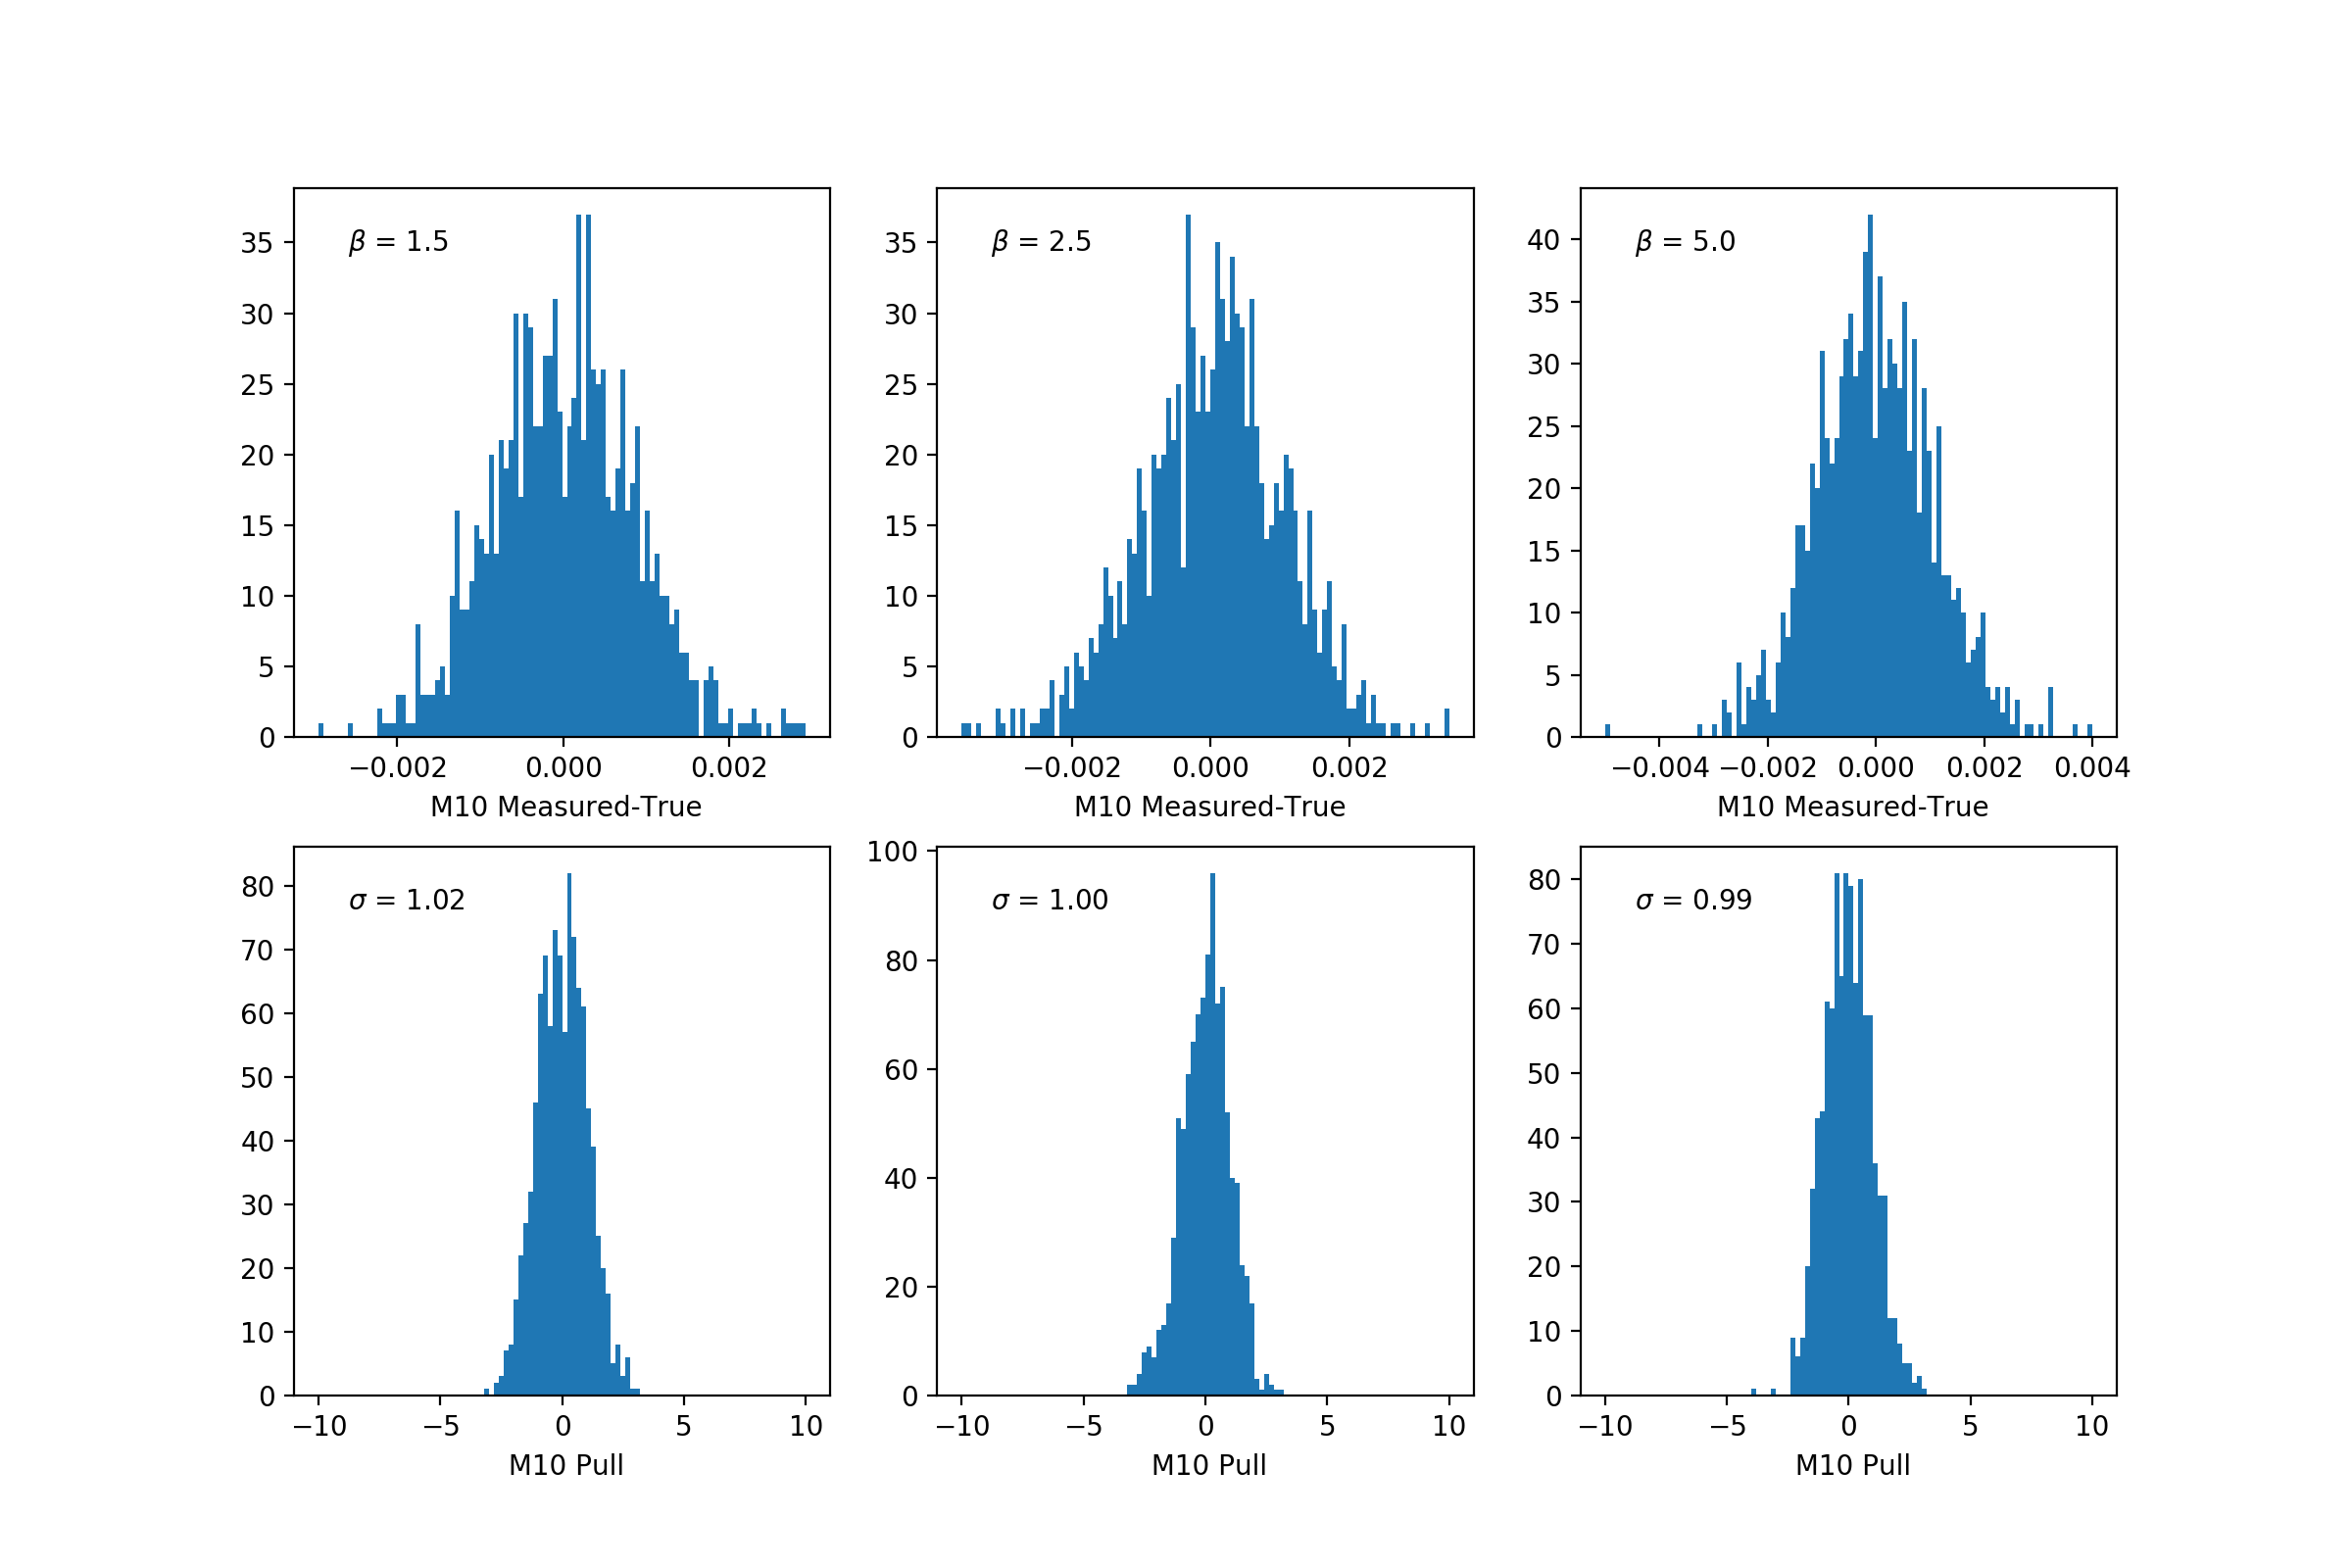

M01


<IPython.core.display.Javascript object>

M11


<IPython.core.display.Javascript object>


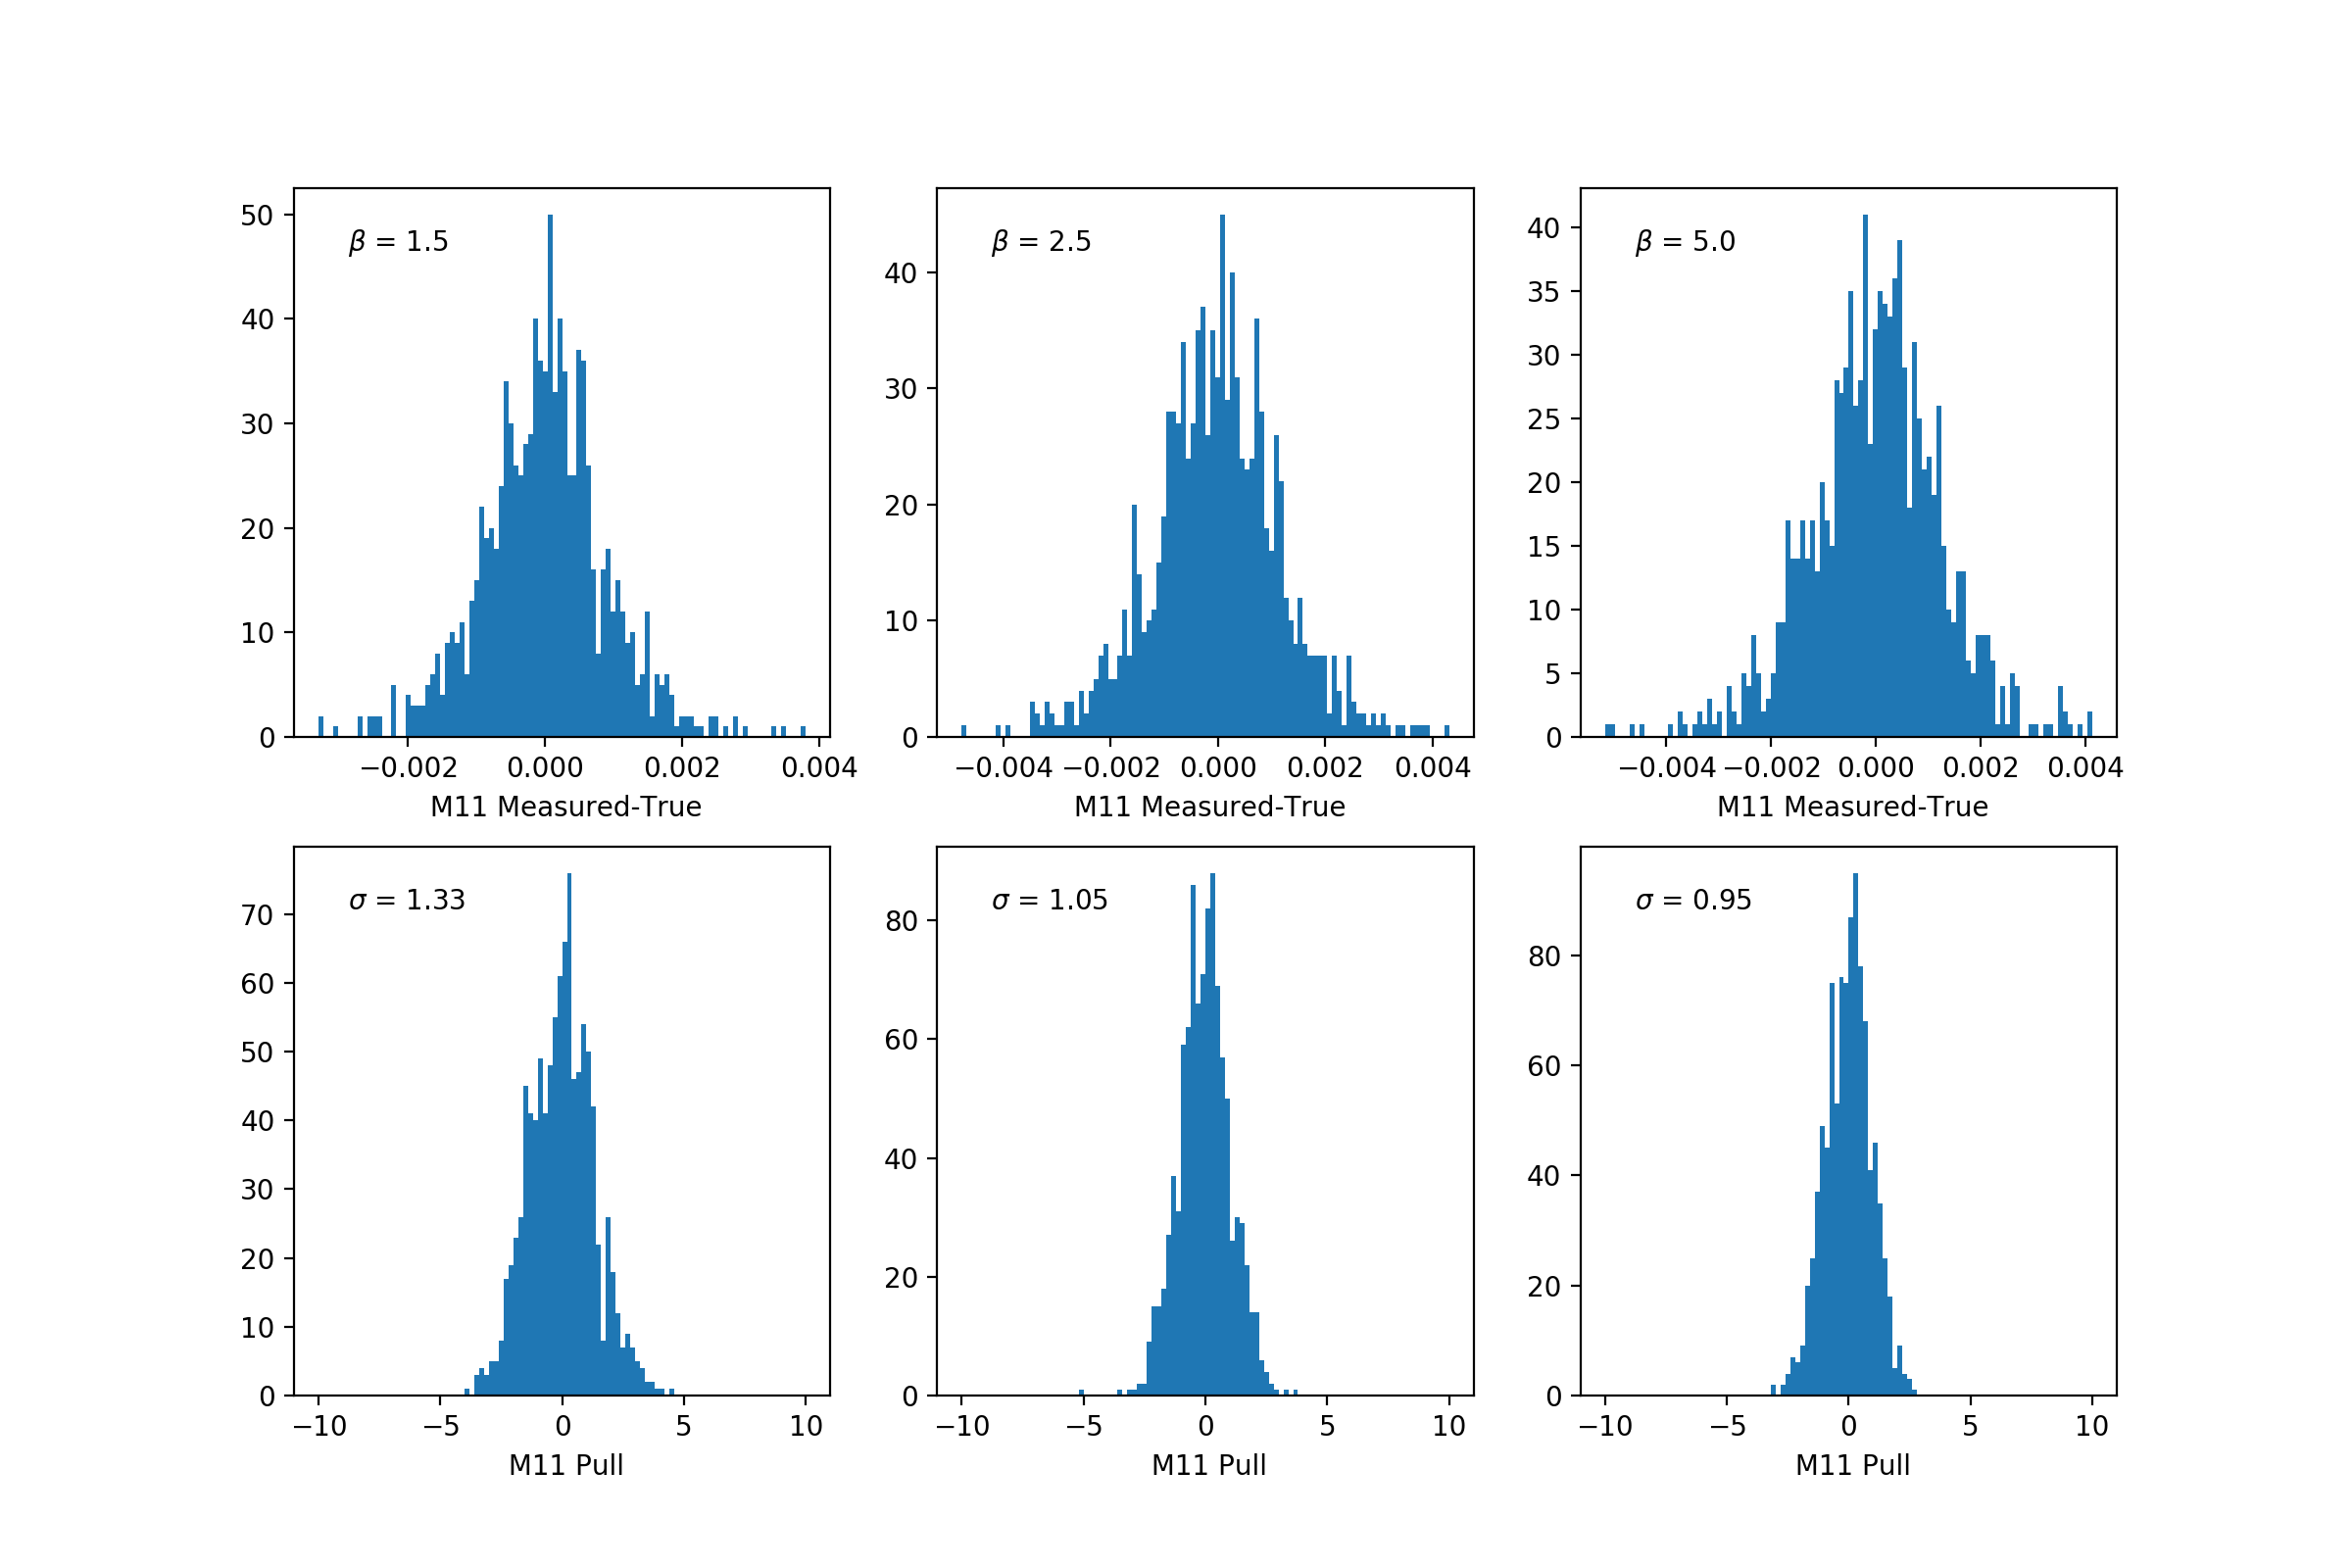

M20


<IPython.core.display.Javascript object>

M02


<IPython.core.display.Javascript object>


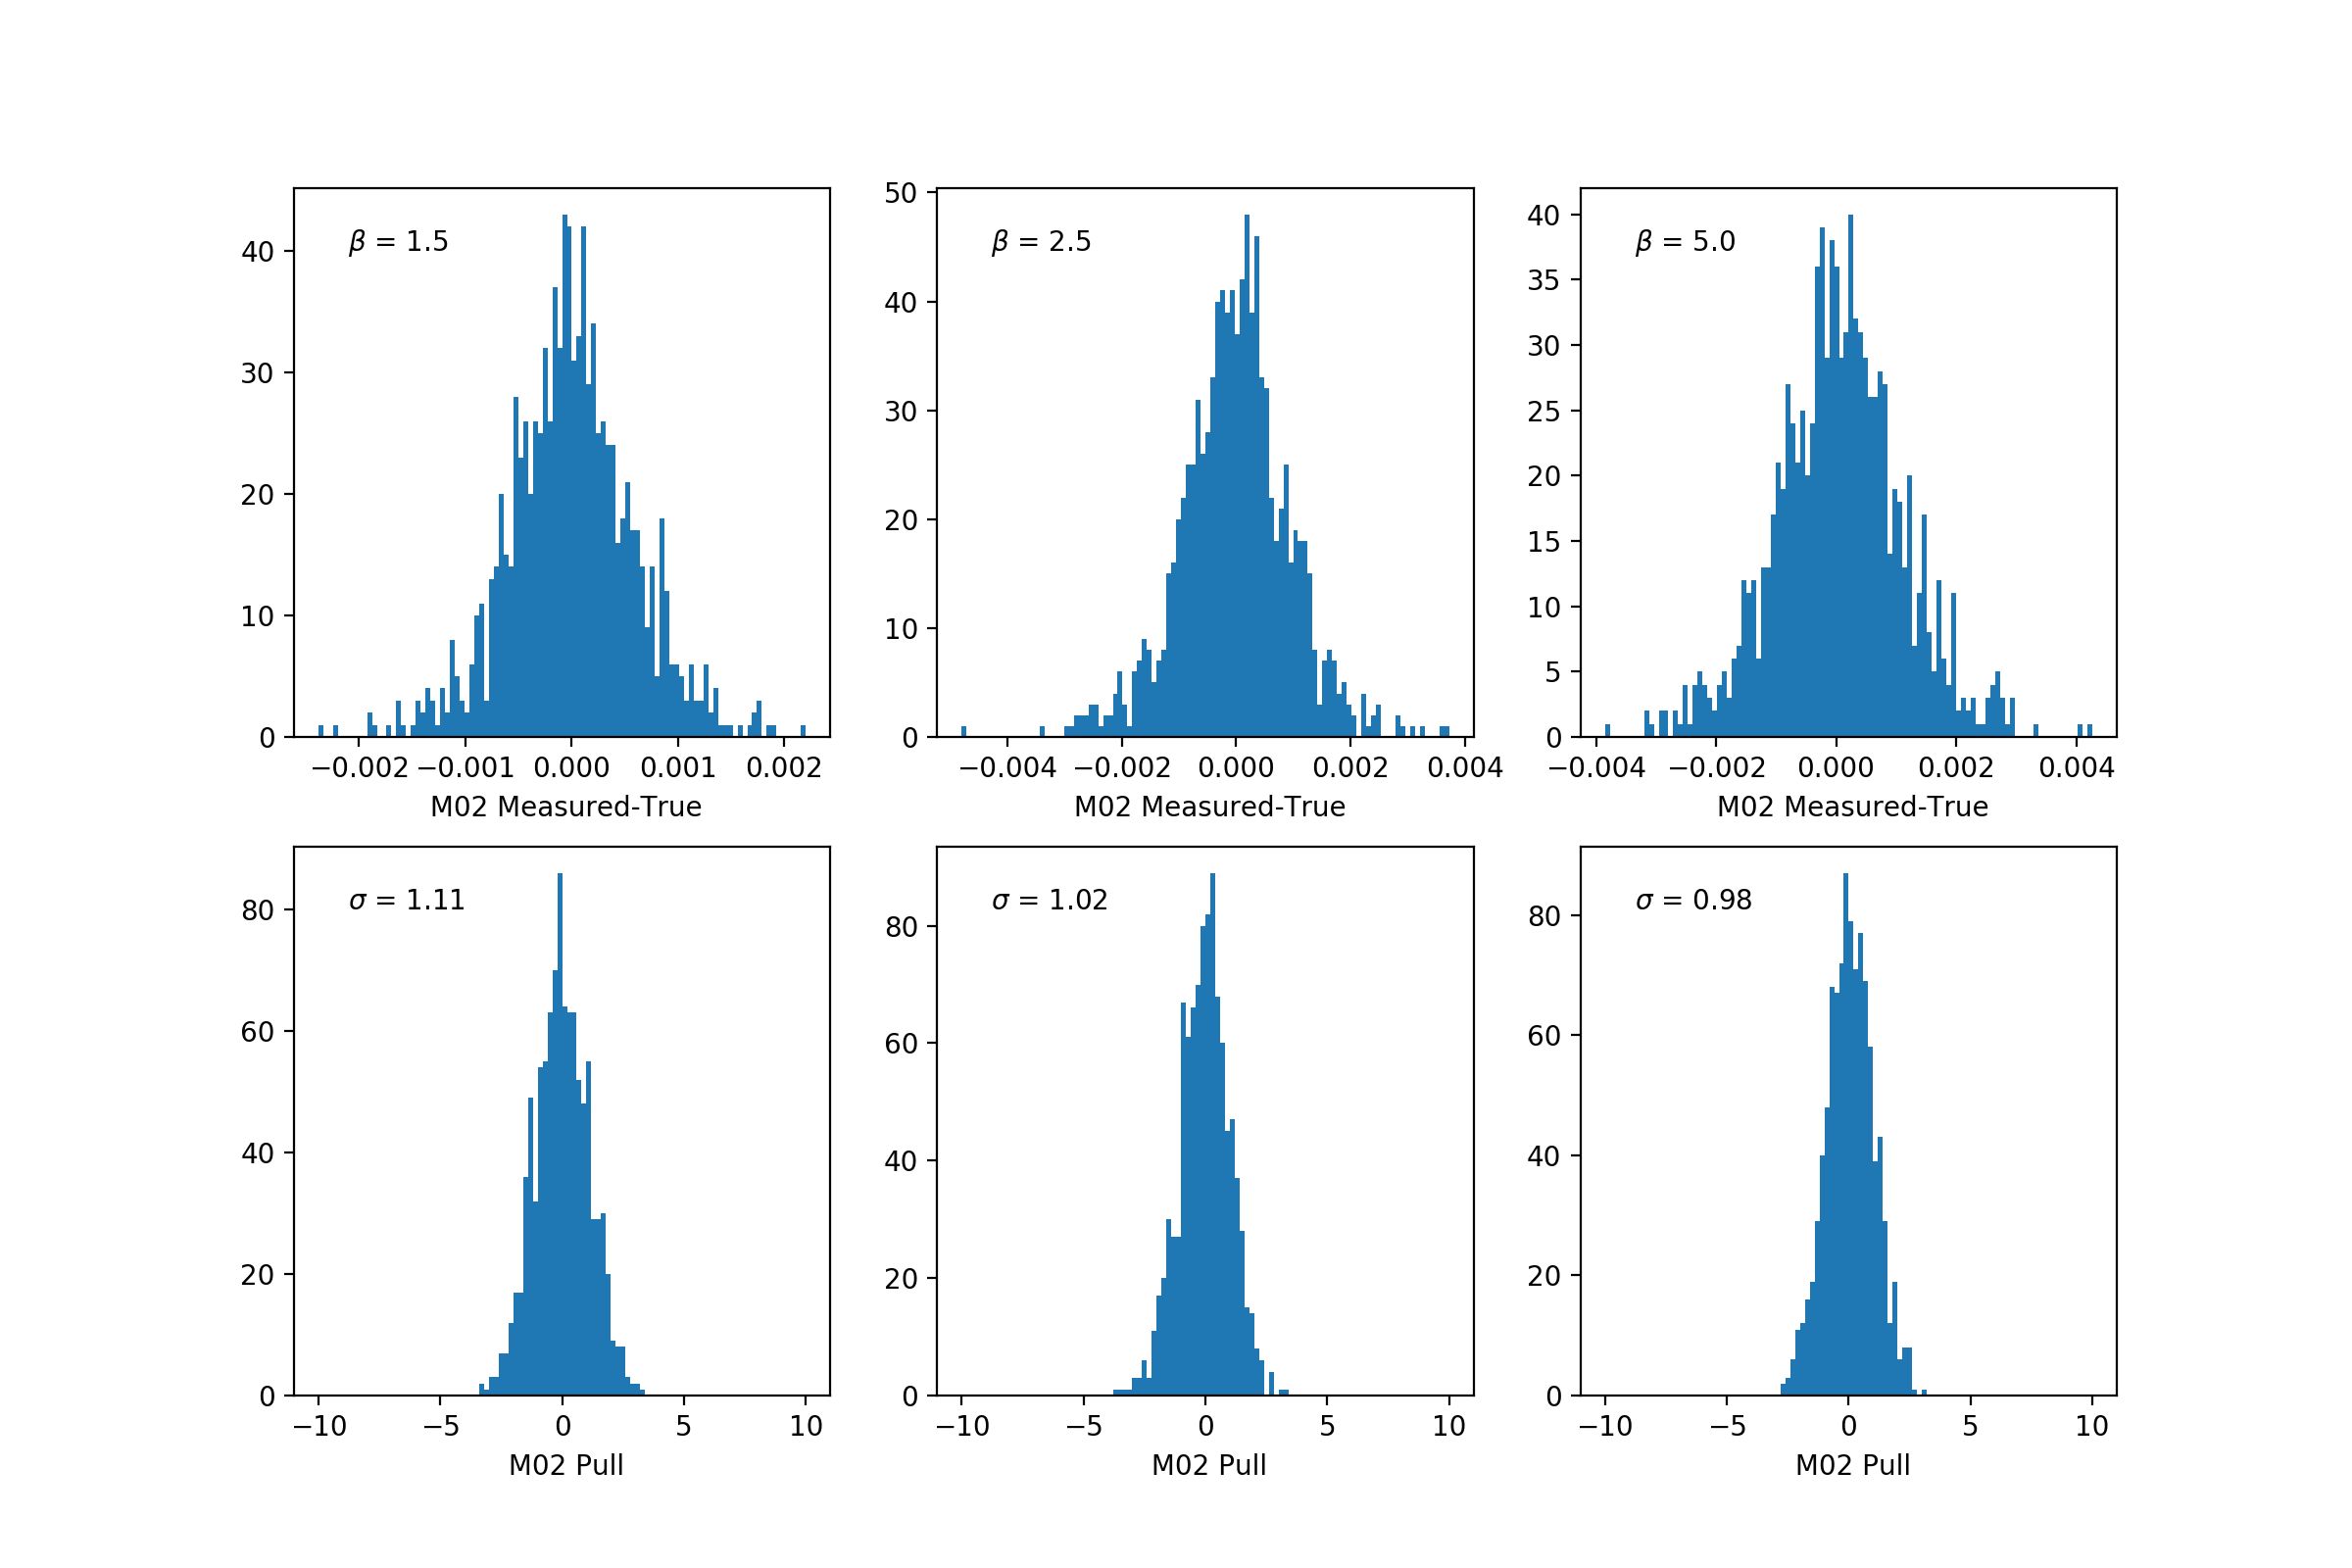

M21


<IPython.core.display.Javascript object>


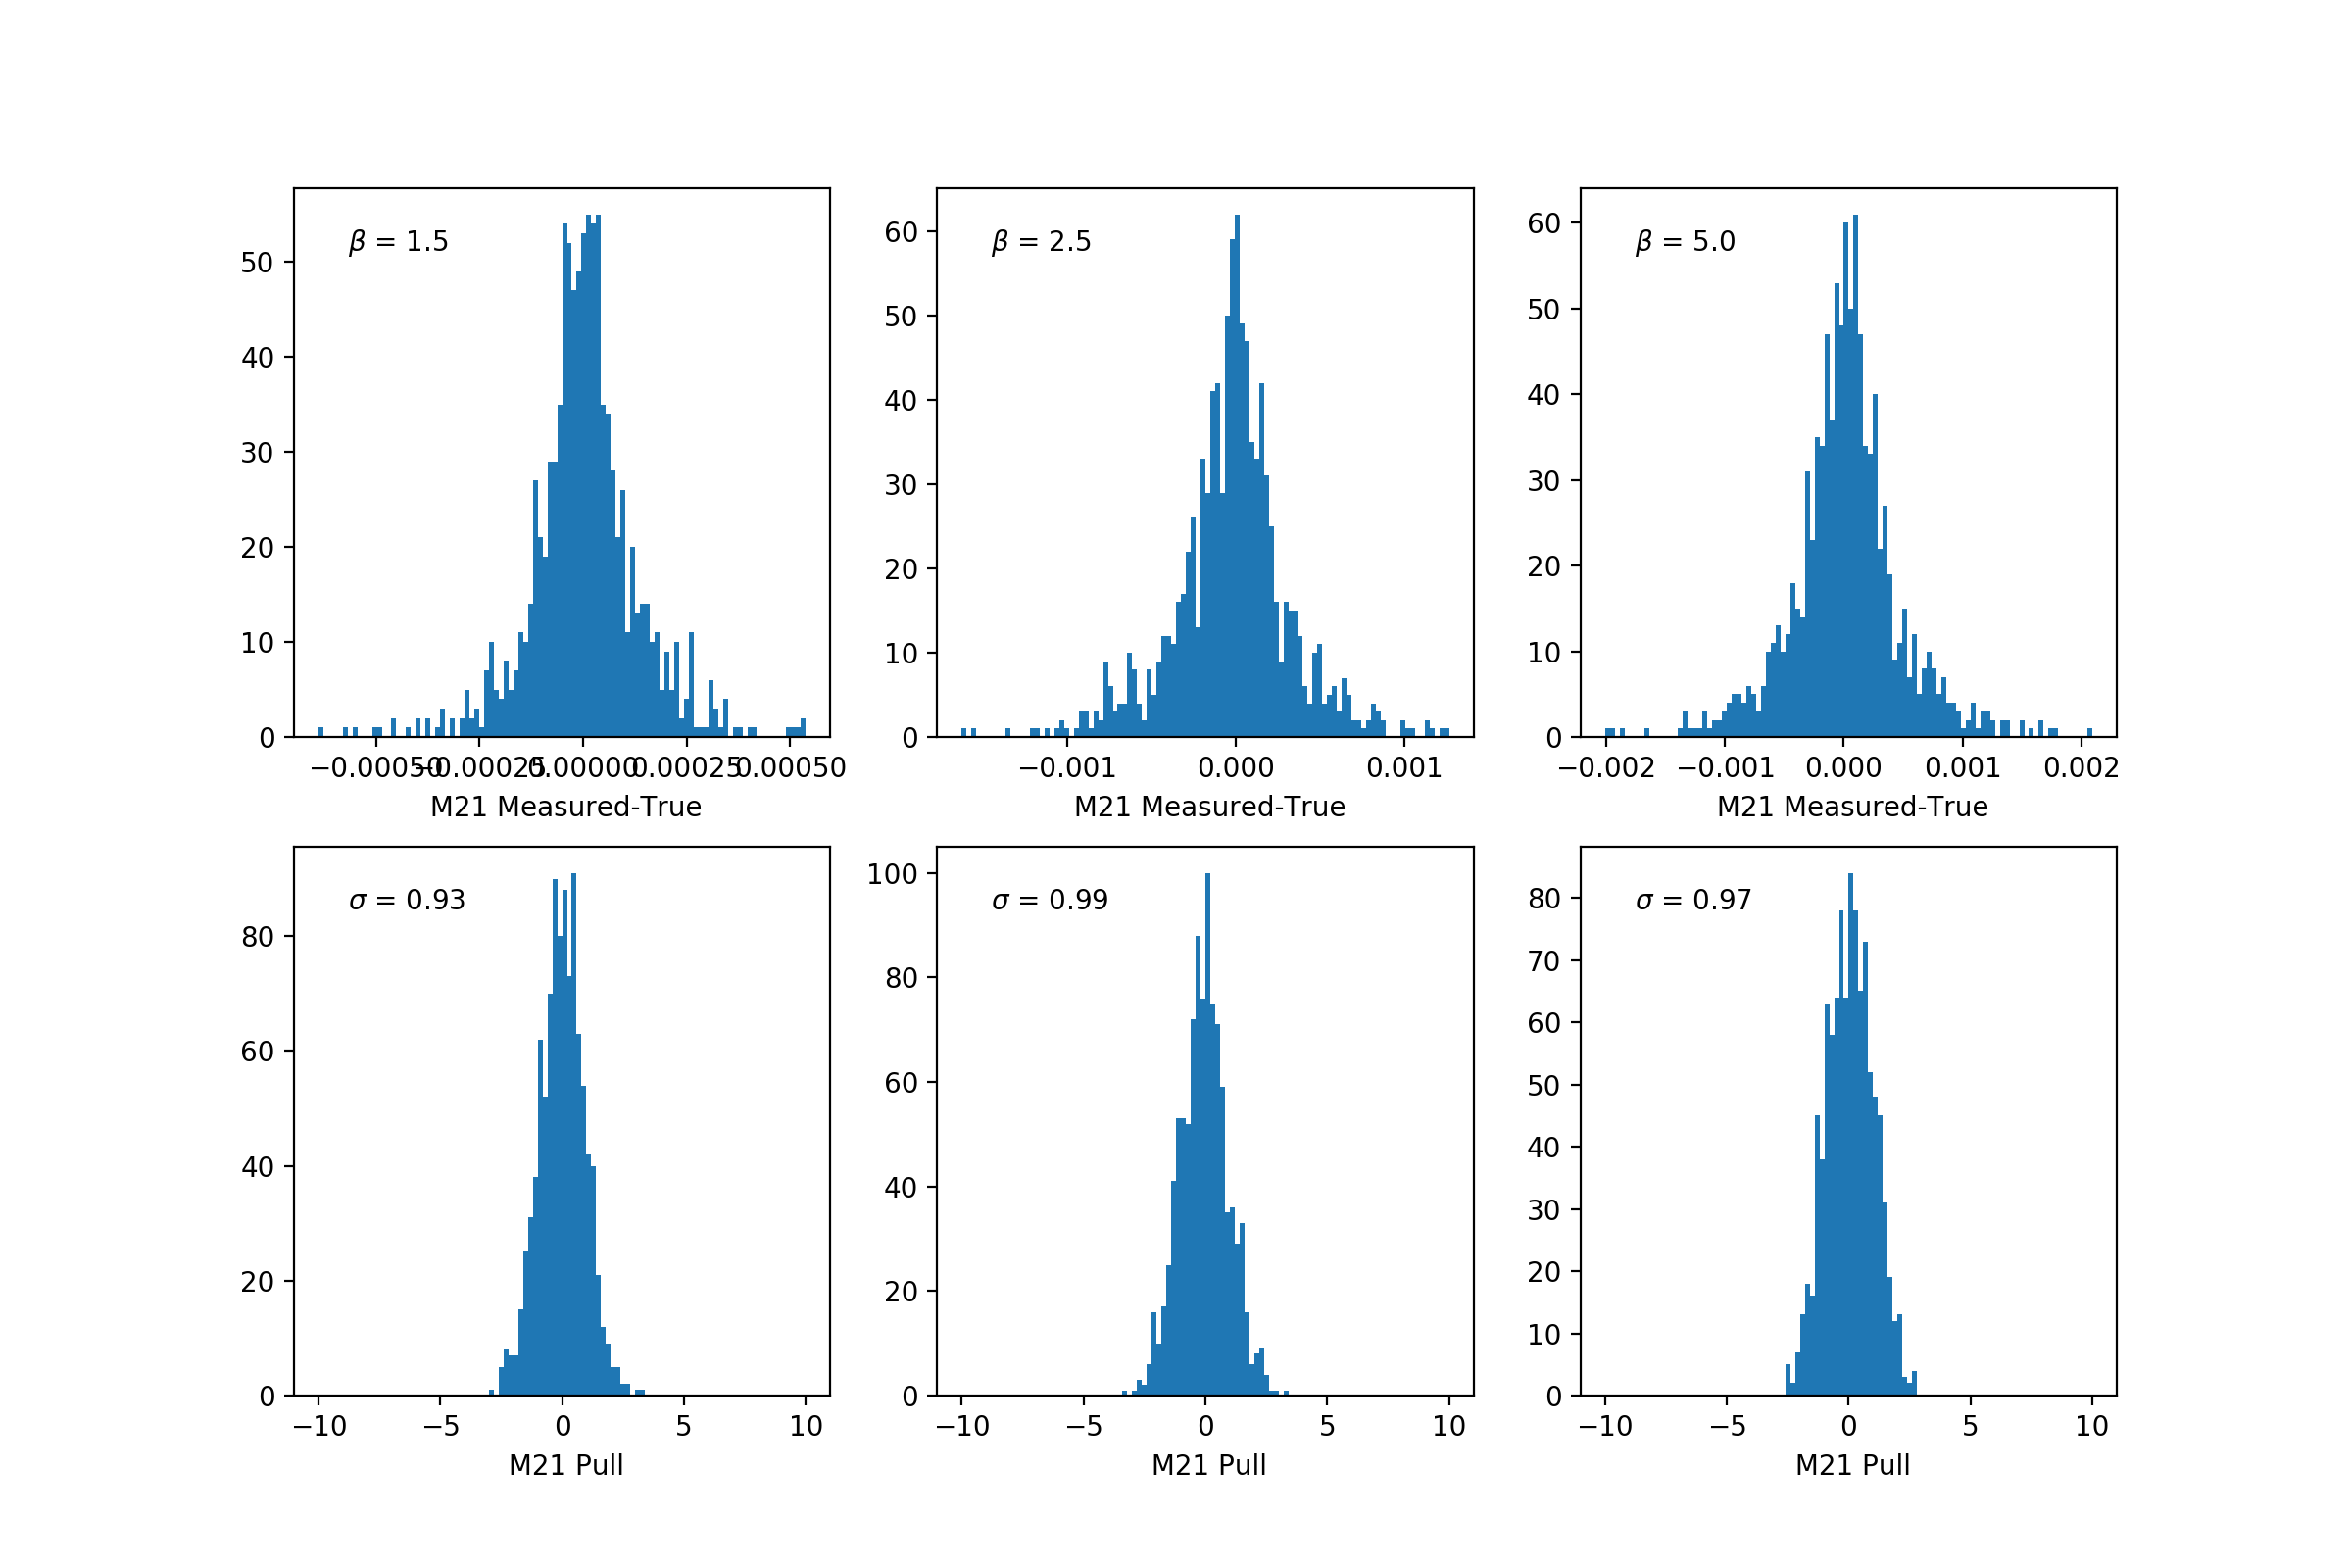

M12


<IPython.core.display.Javascript object>


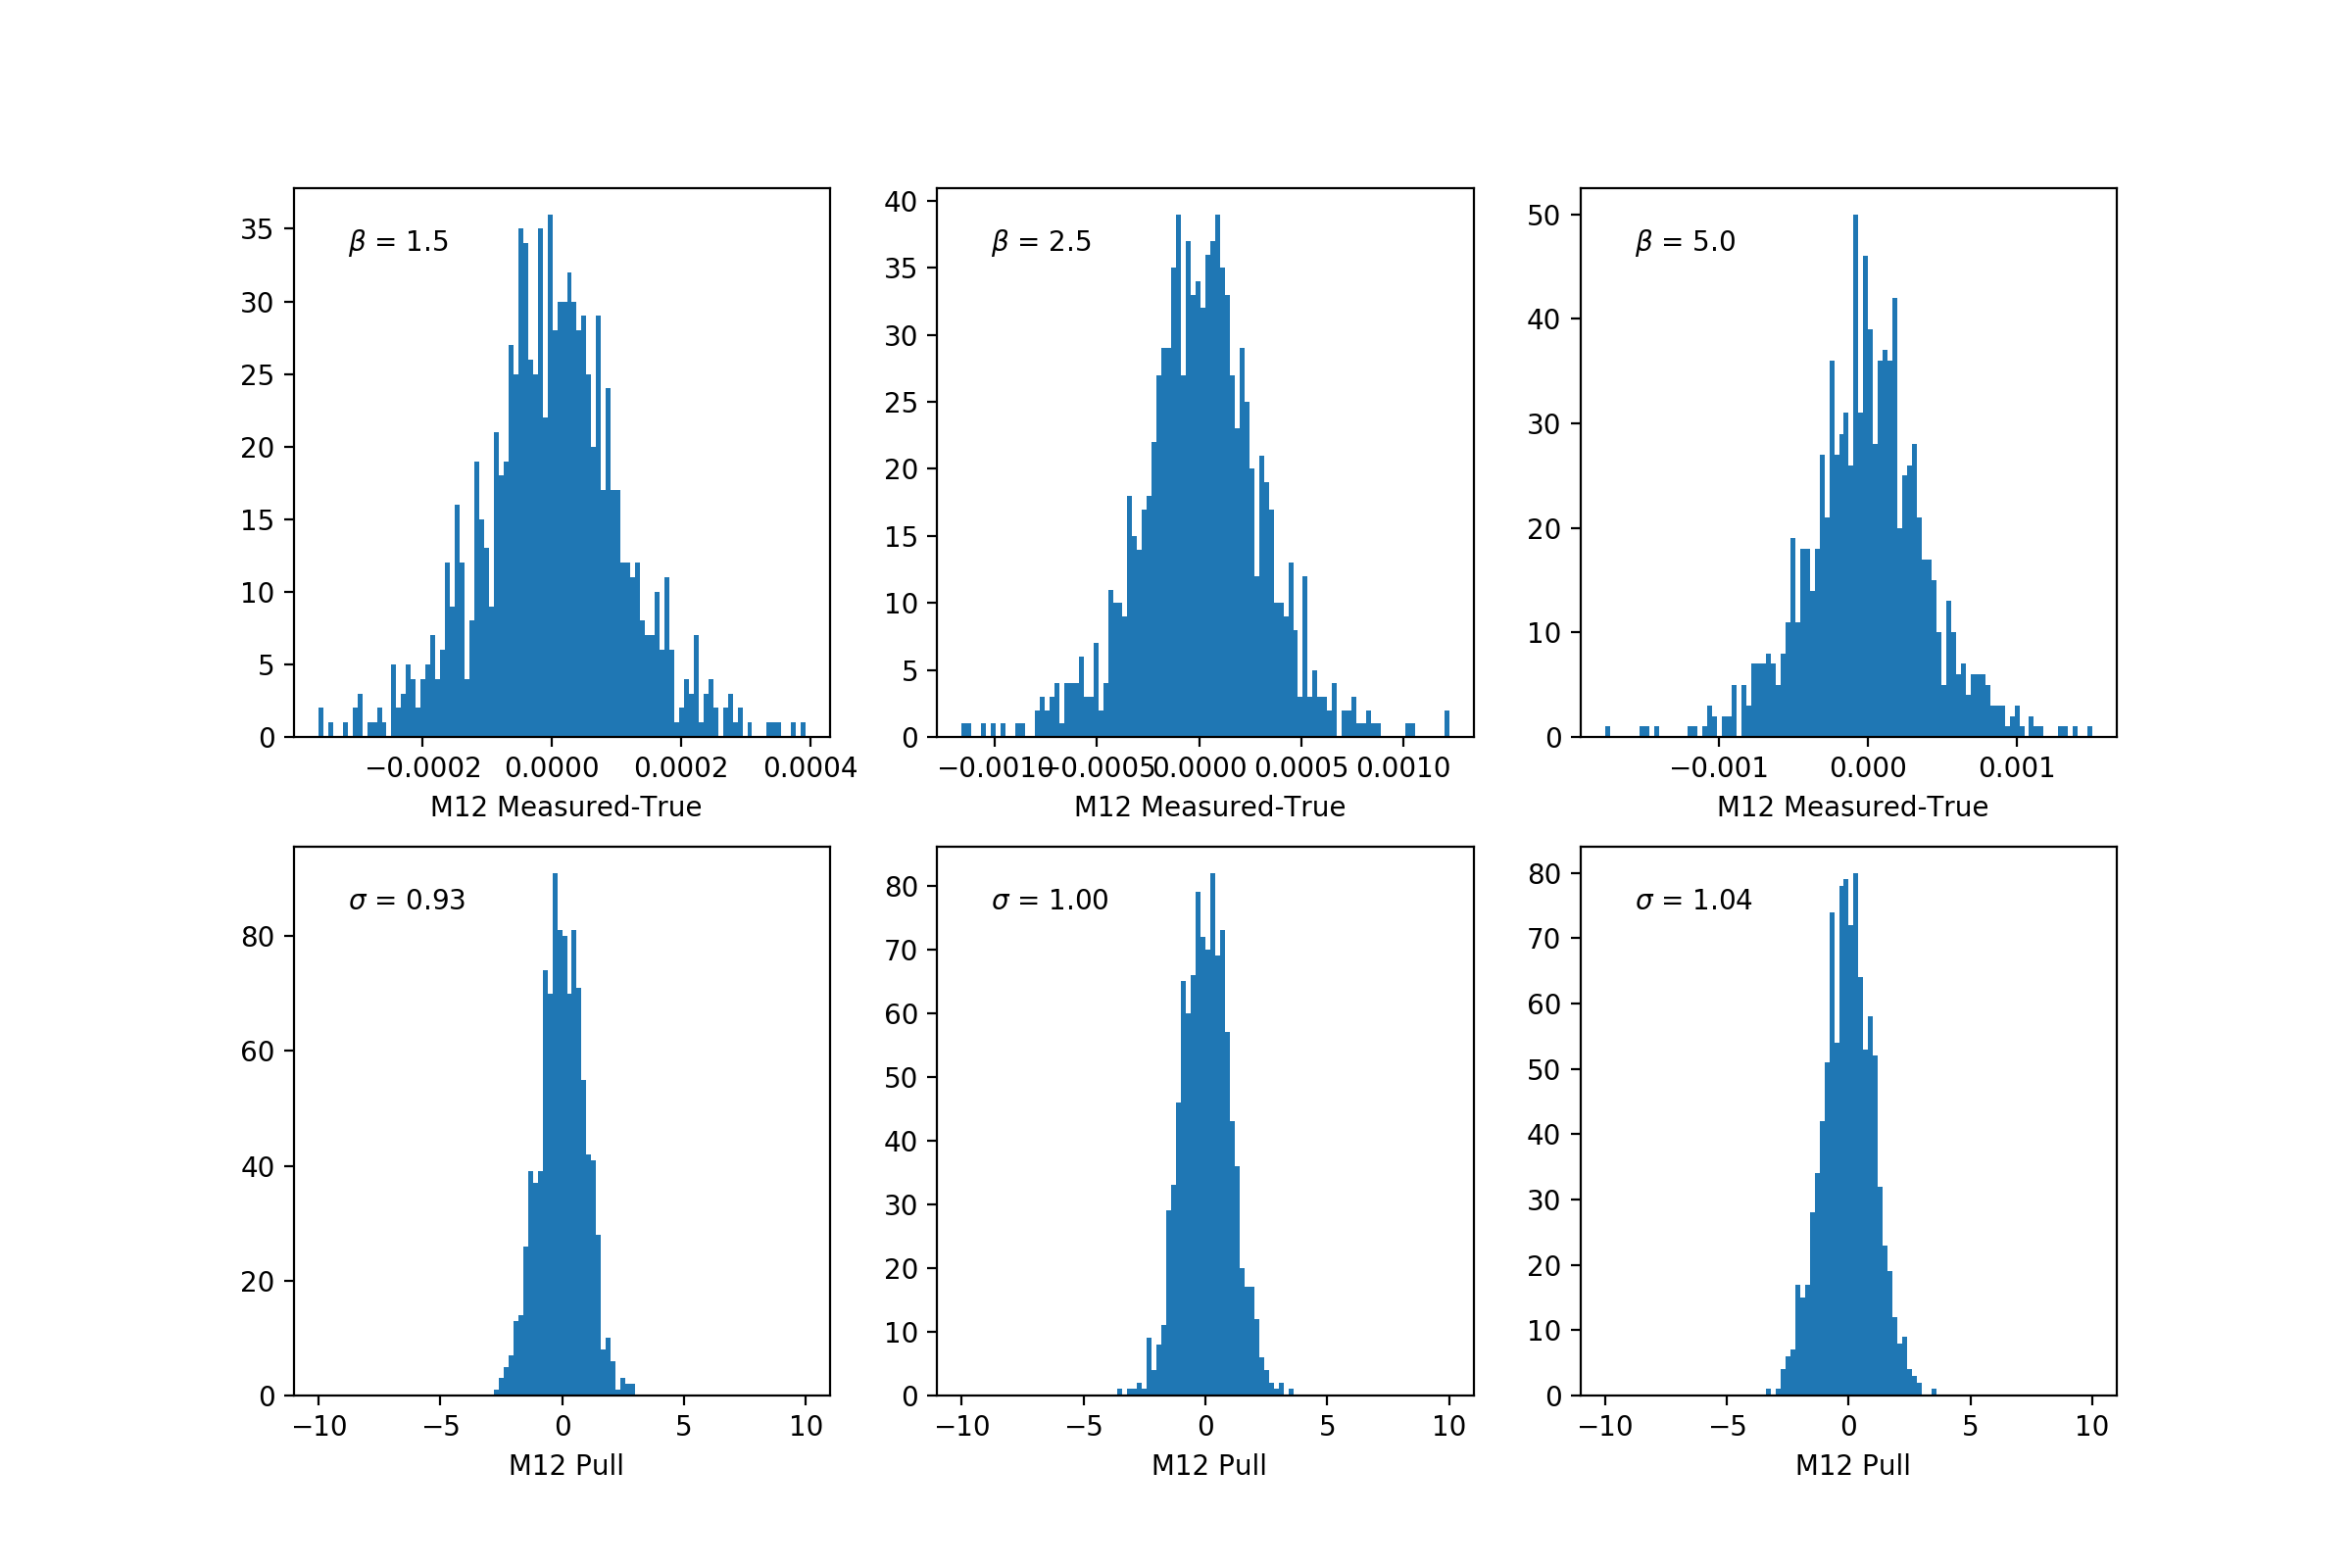

M30


<IPython.core.display.Javascript object>


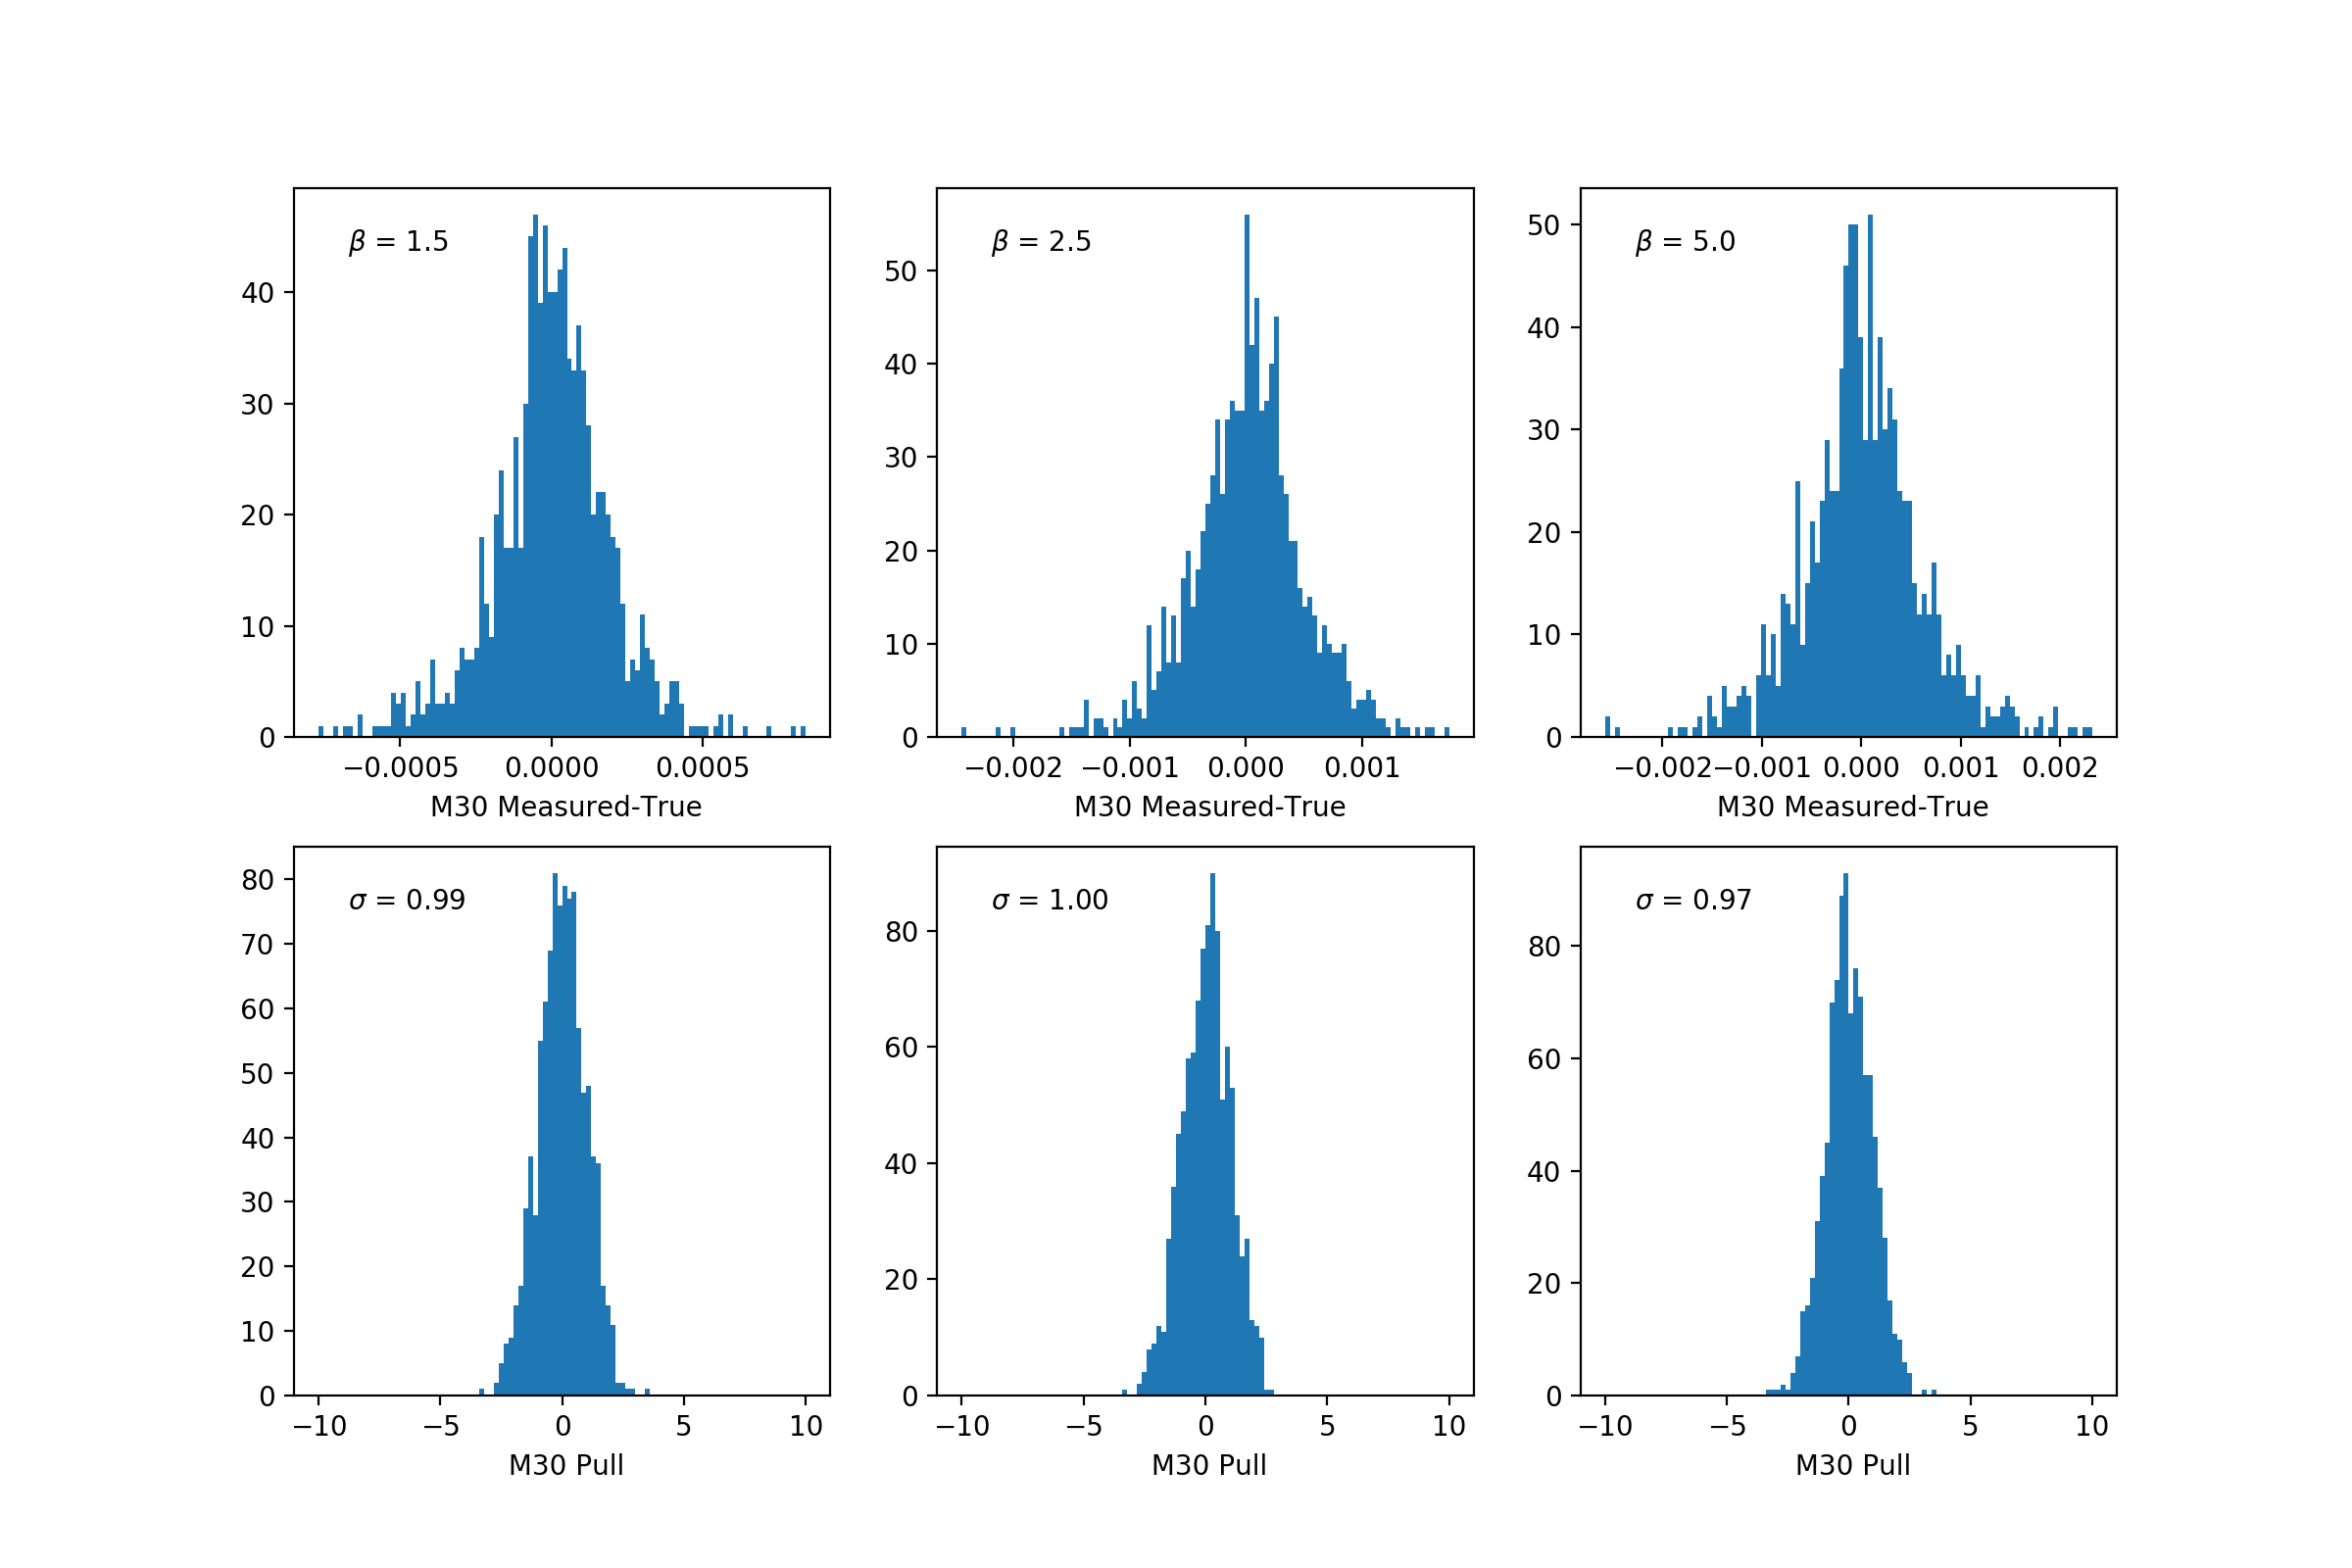

M03


<IPython.core.display.Javascript object>

M31


<IPython.core.display.Javascript object>


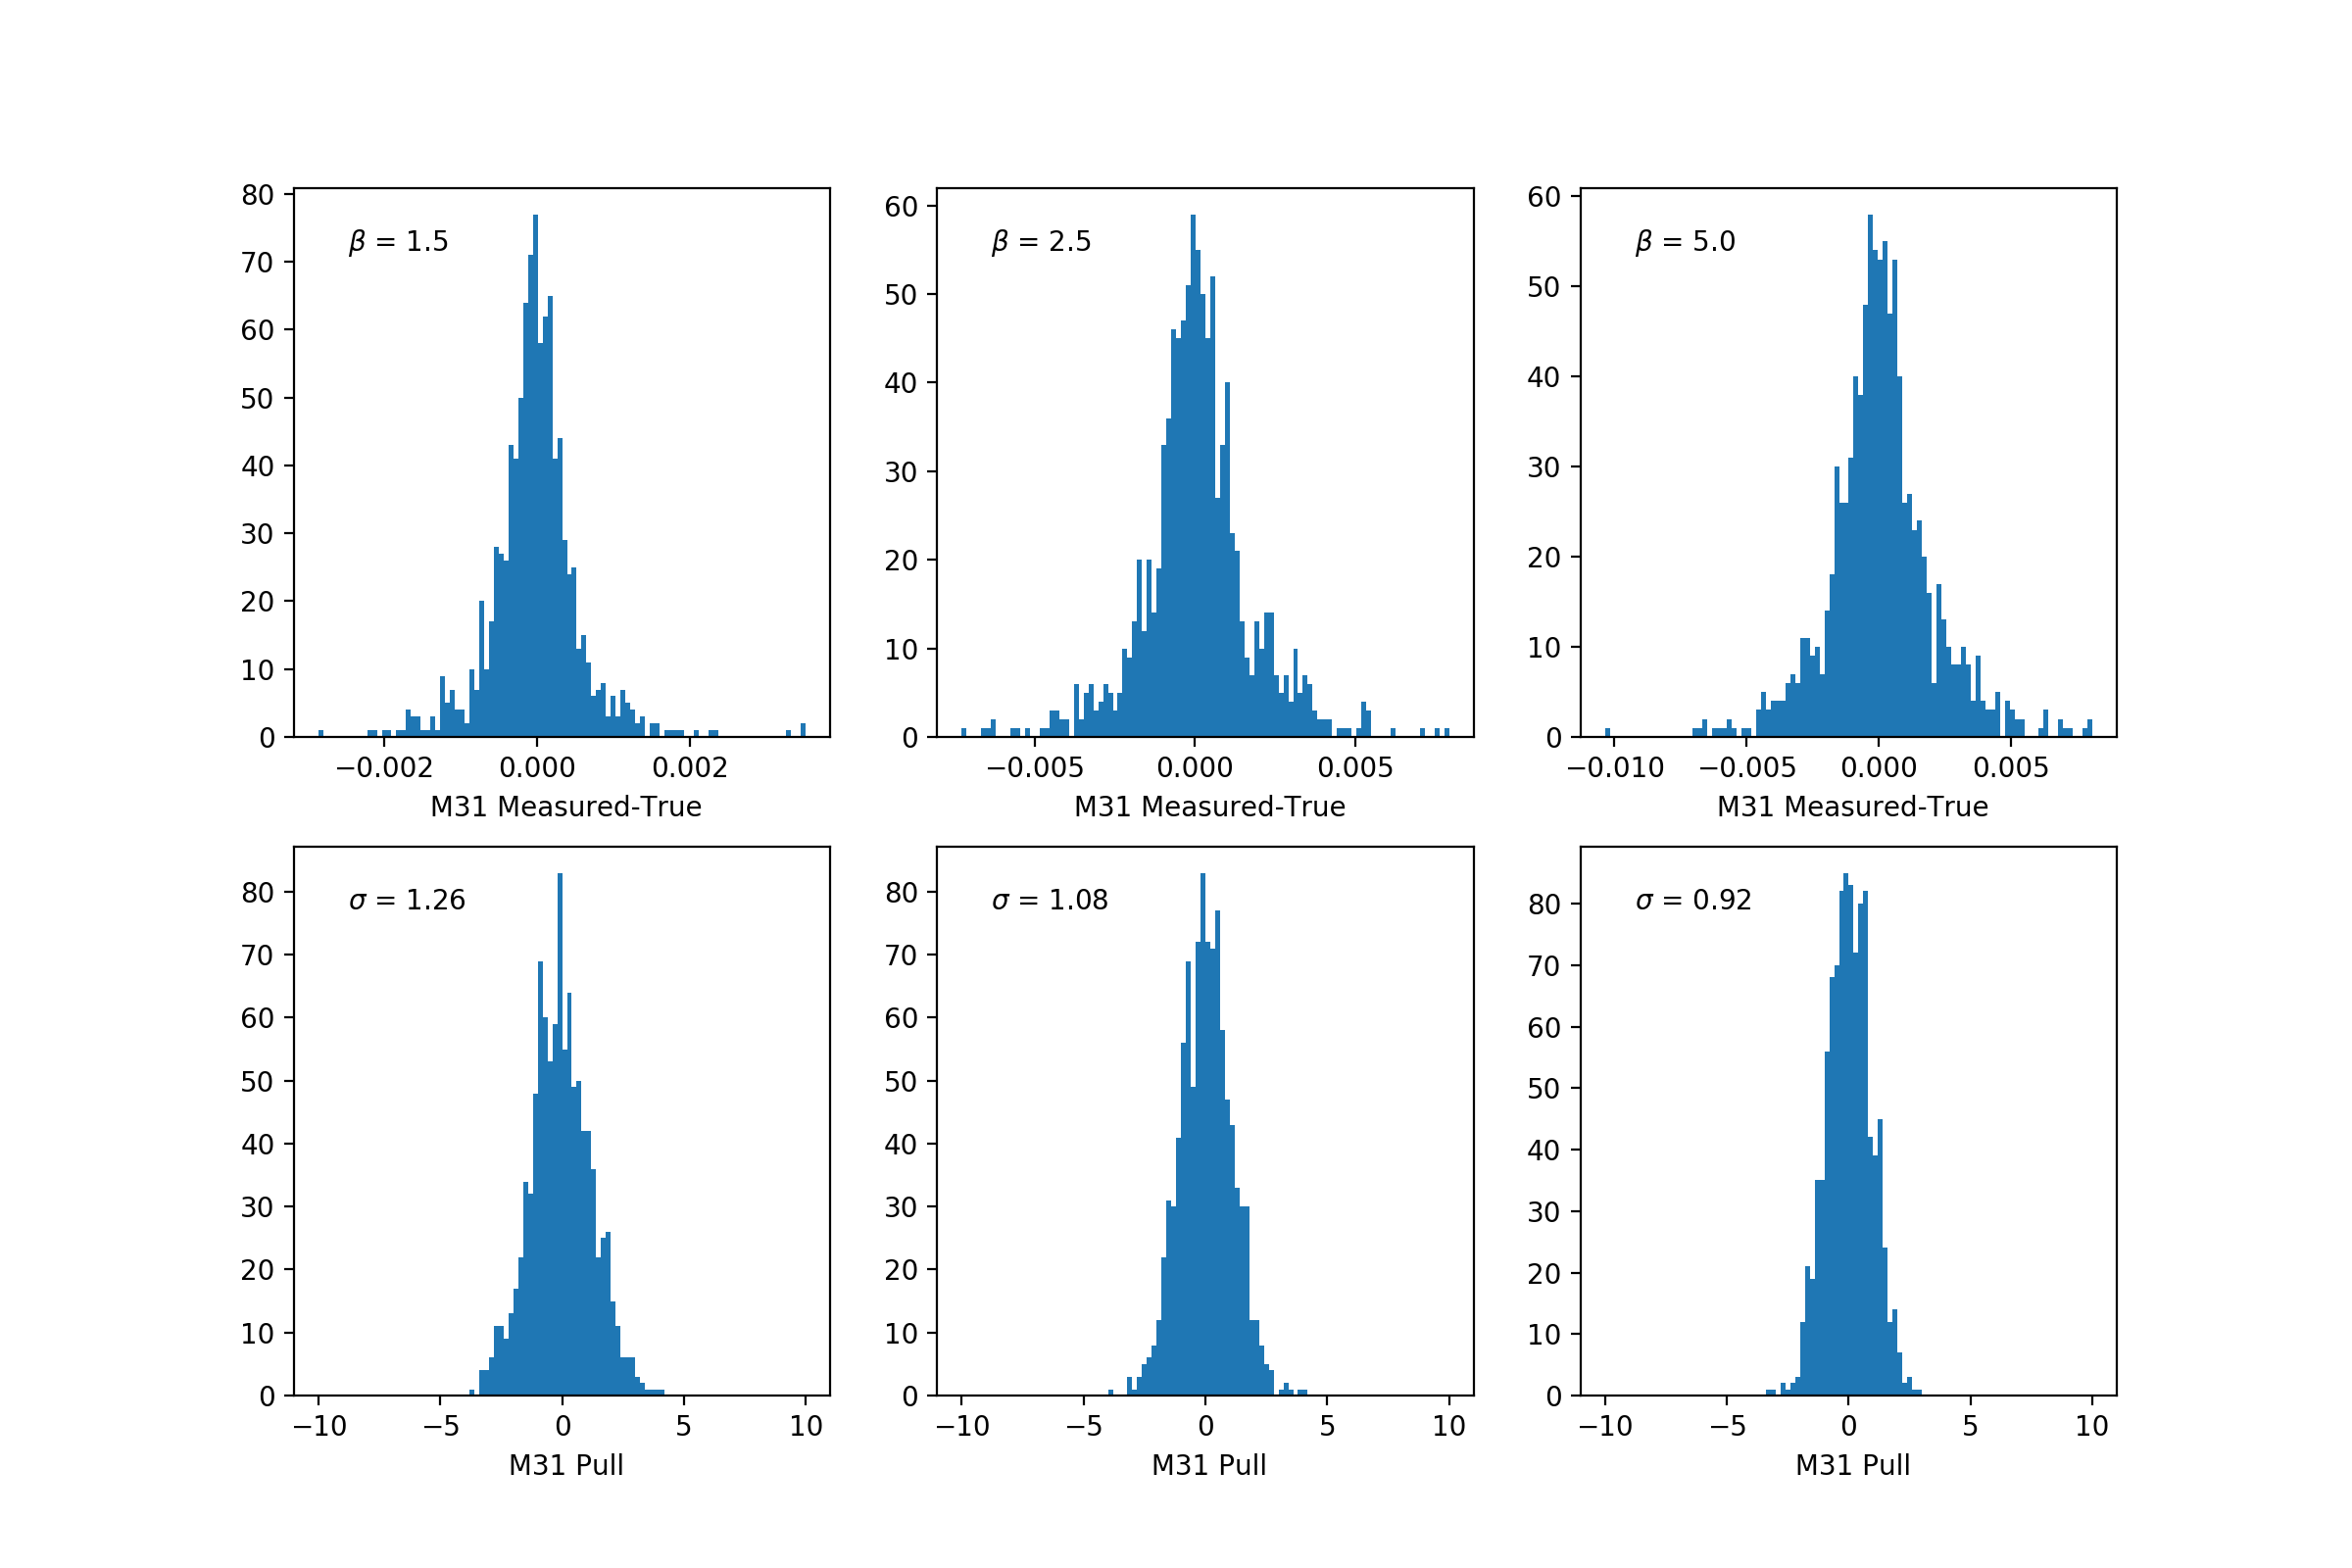

M13


<IPython.core.display.Javascript object>


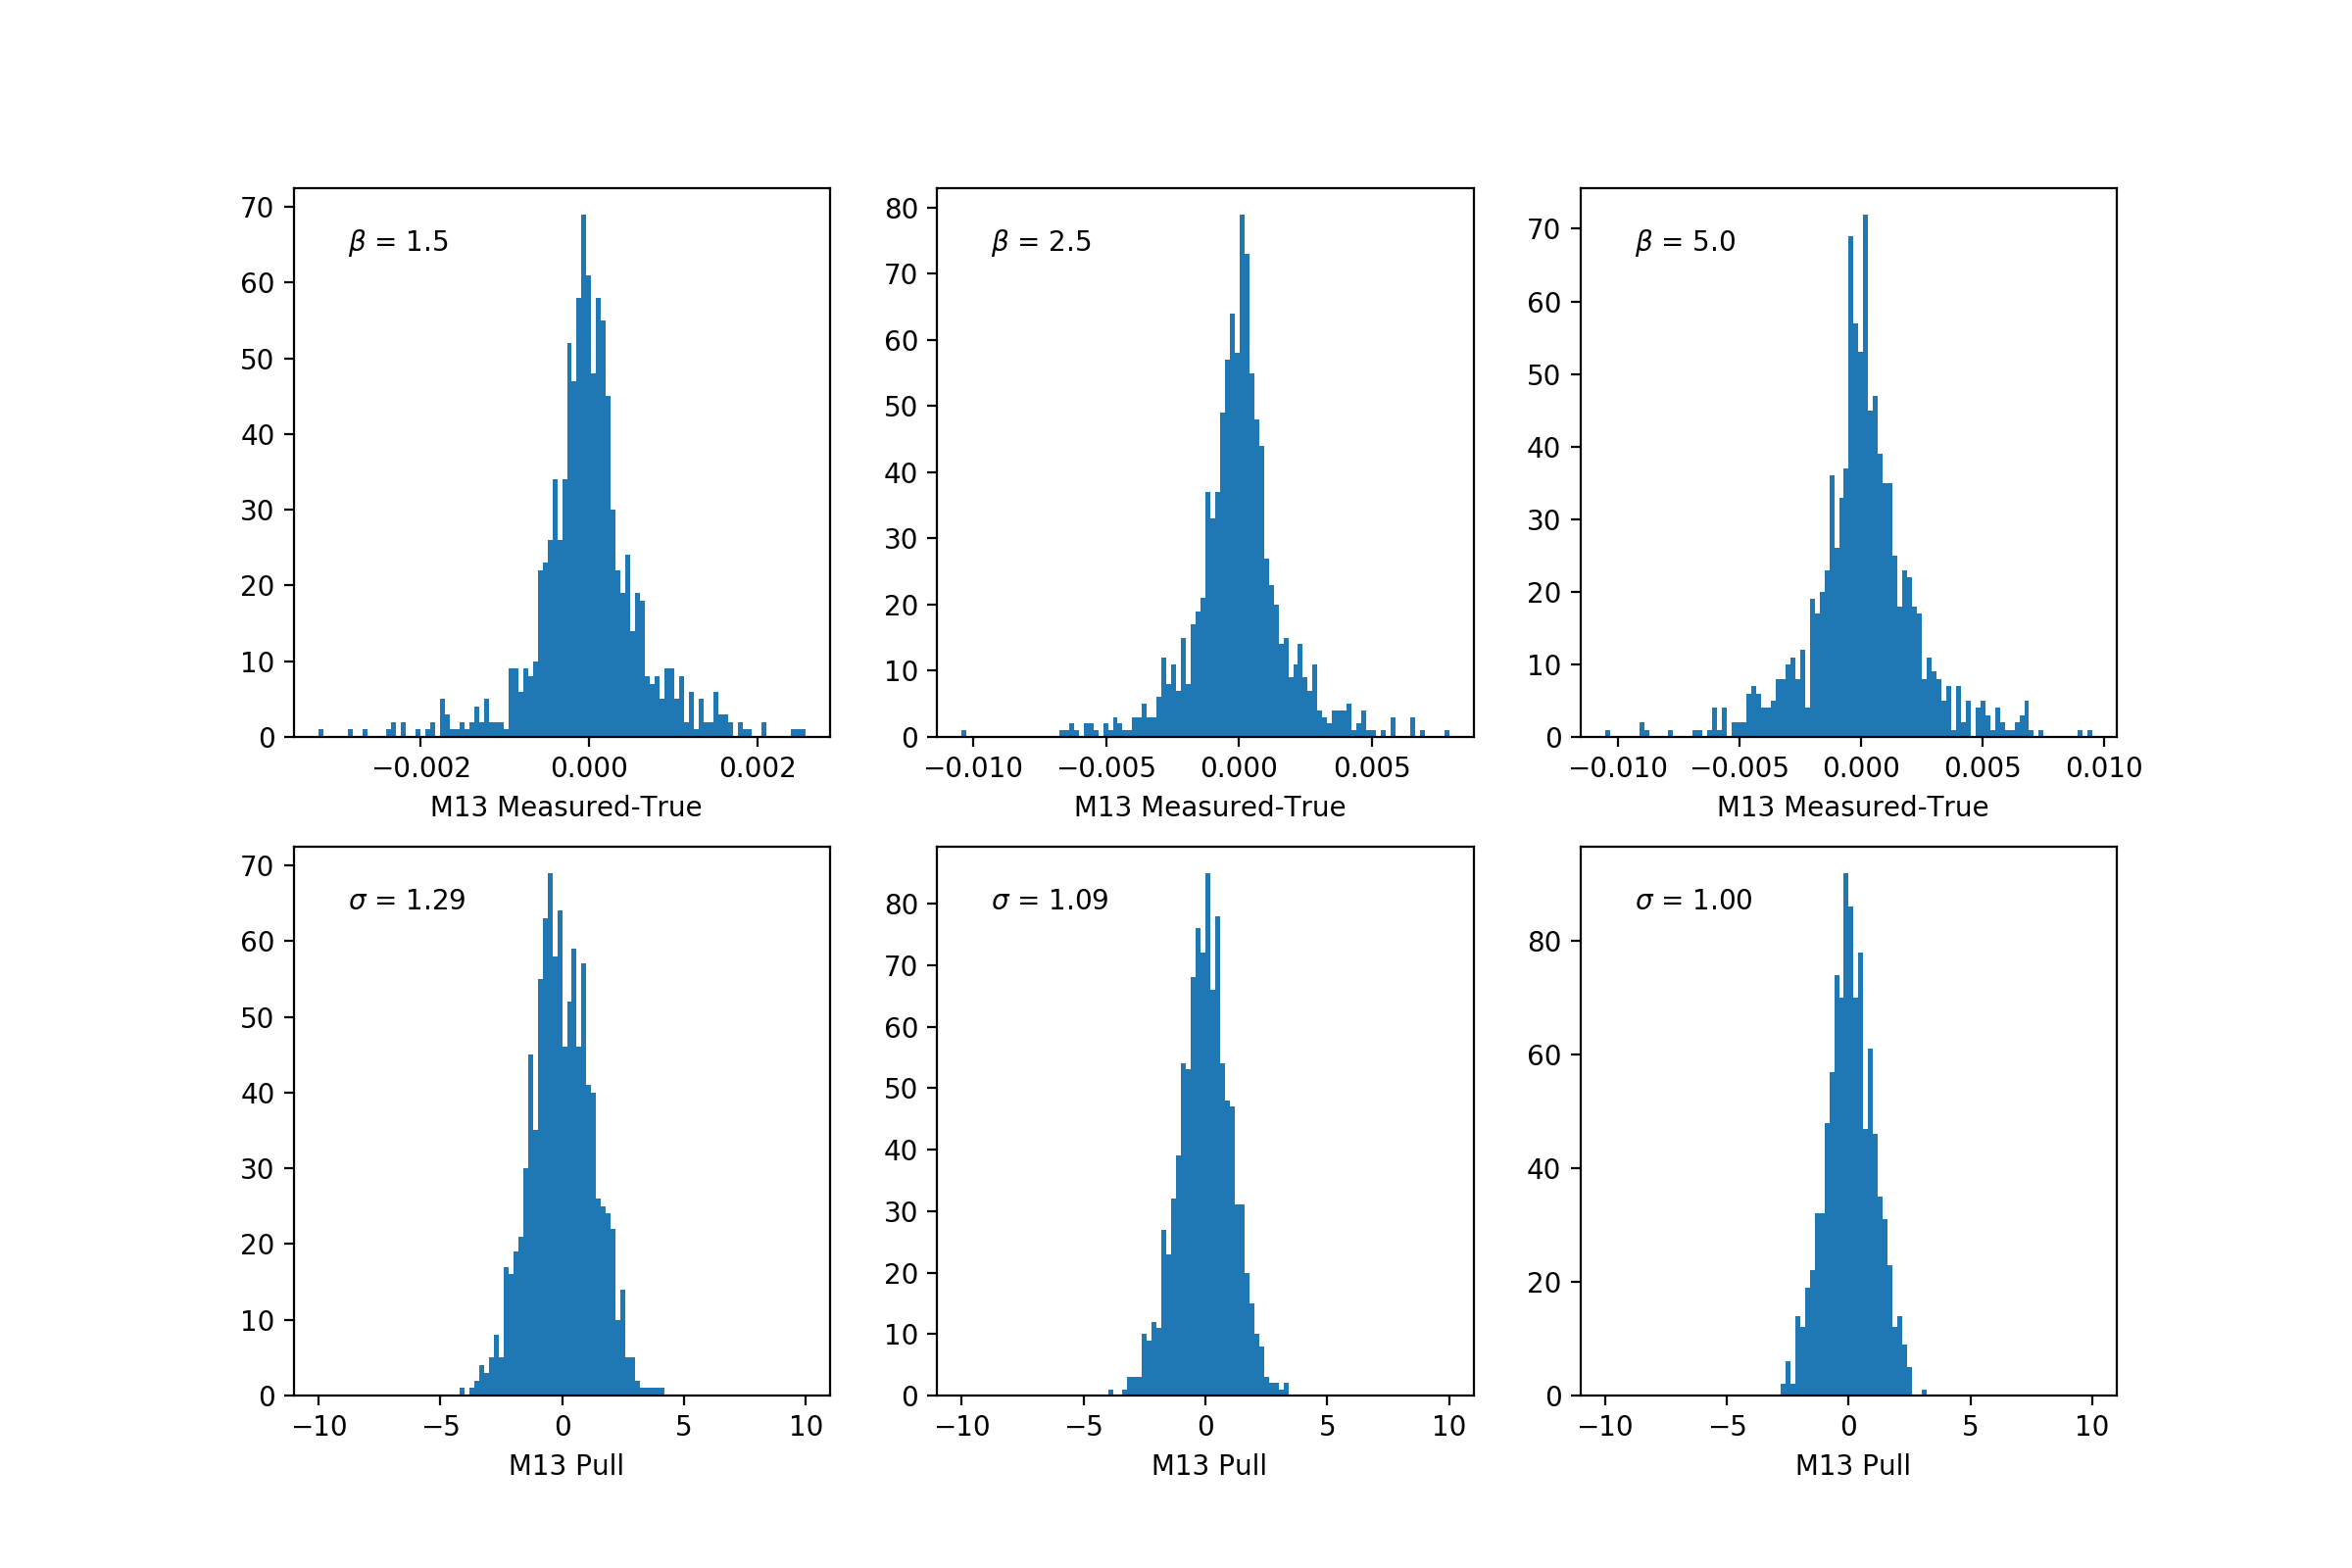

M40


<IPython.core.display.Javascript object>

M04


<IPython.core.display.Javascript object>


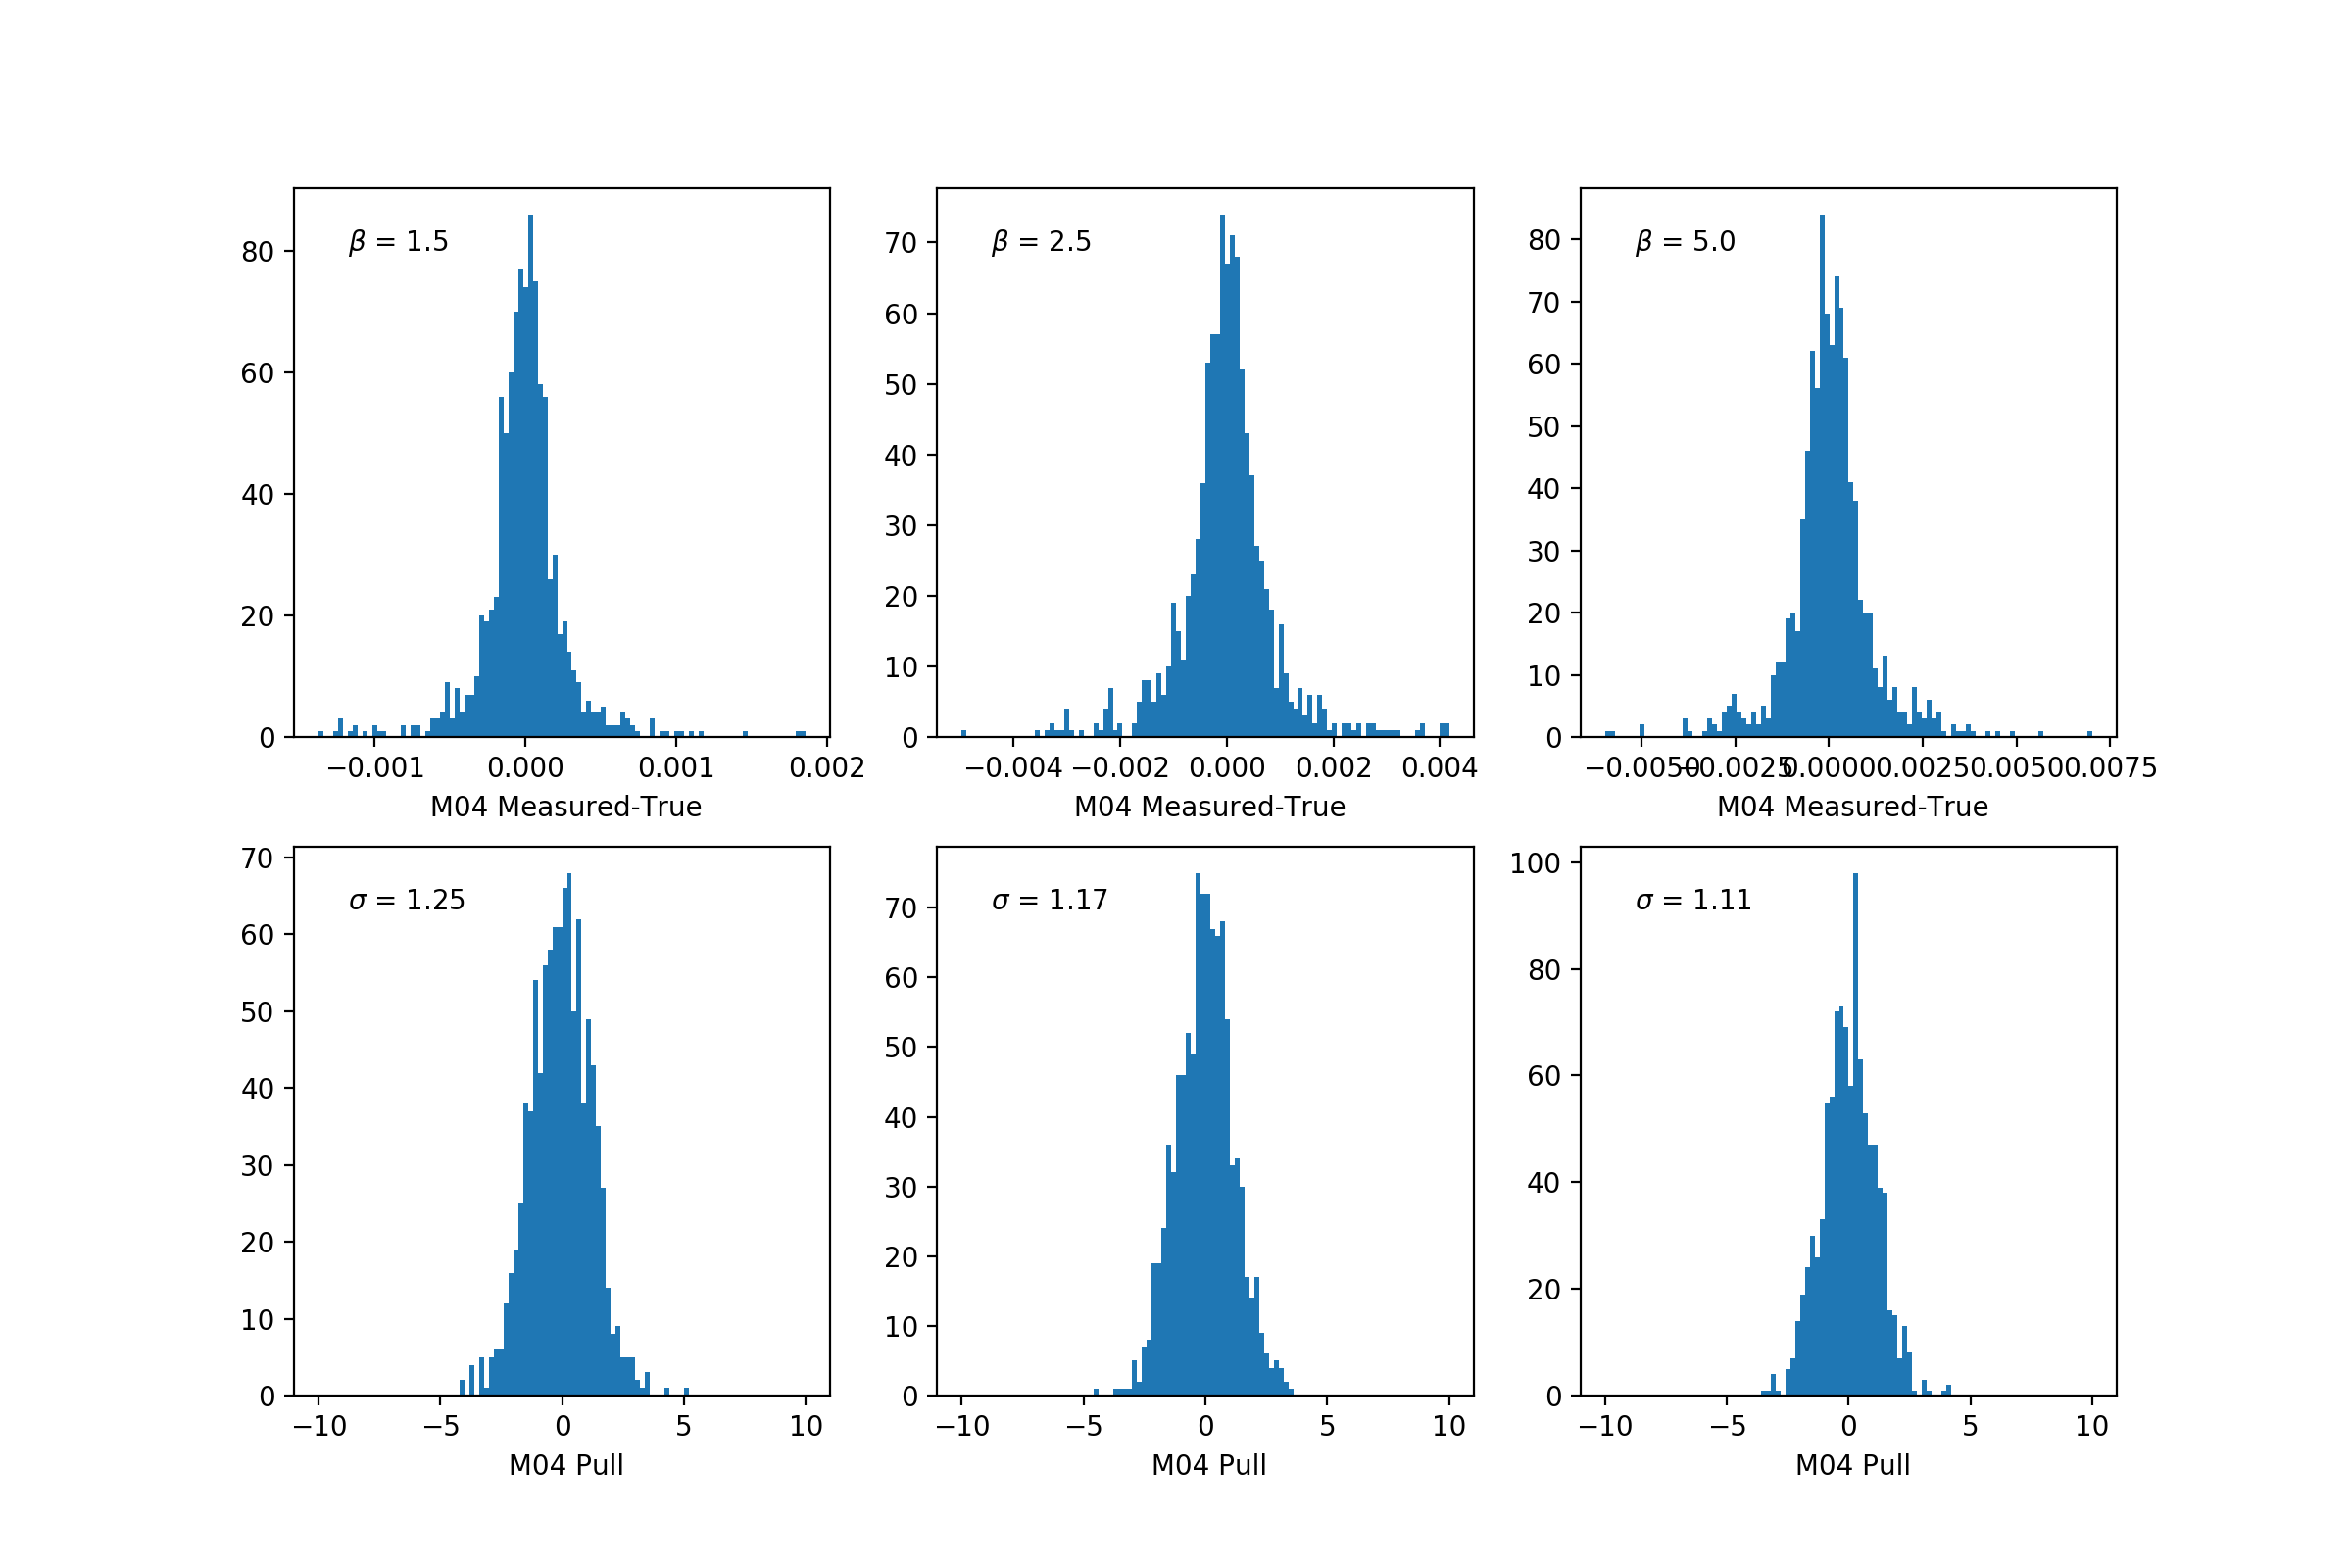

M22


<IPython.core.display.Javascript object>


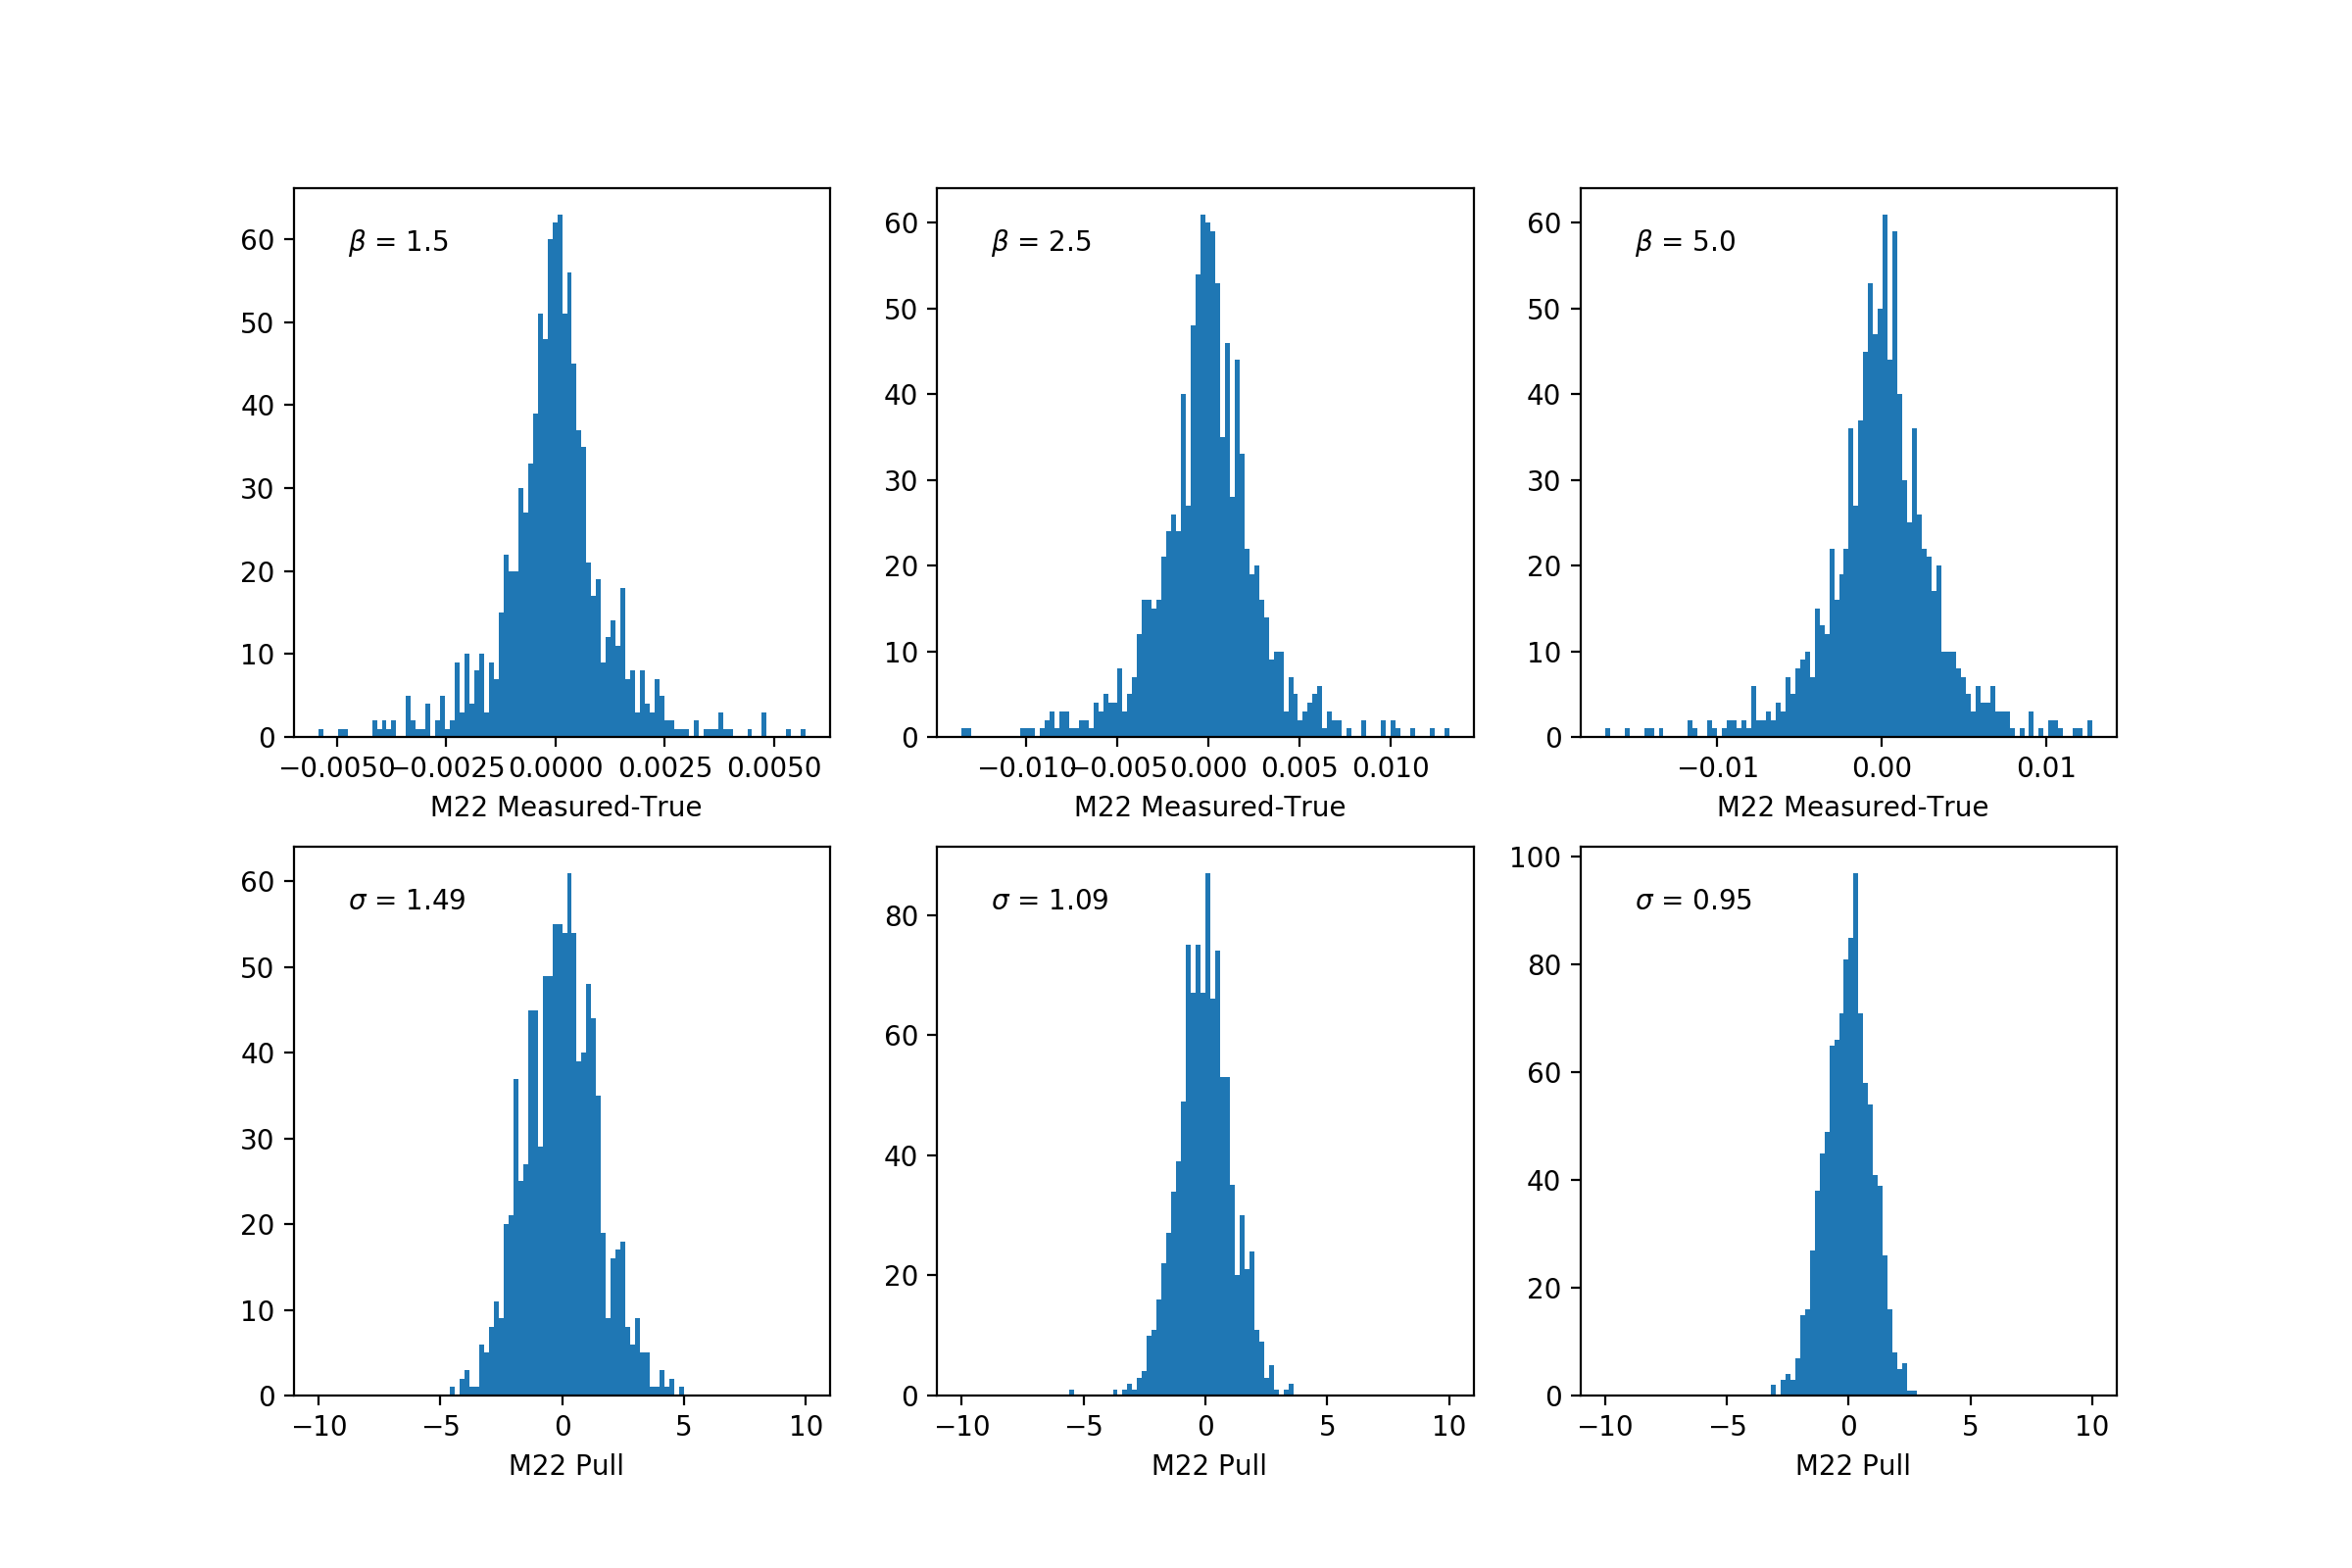

M33


<IPython.core.display.Javascript object>


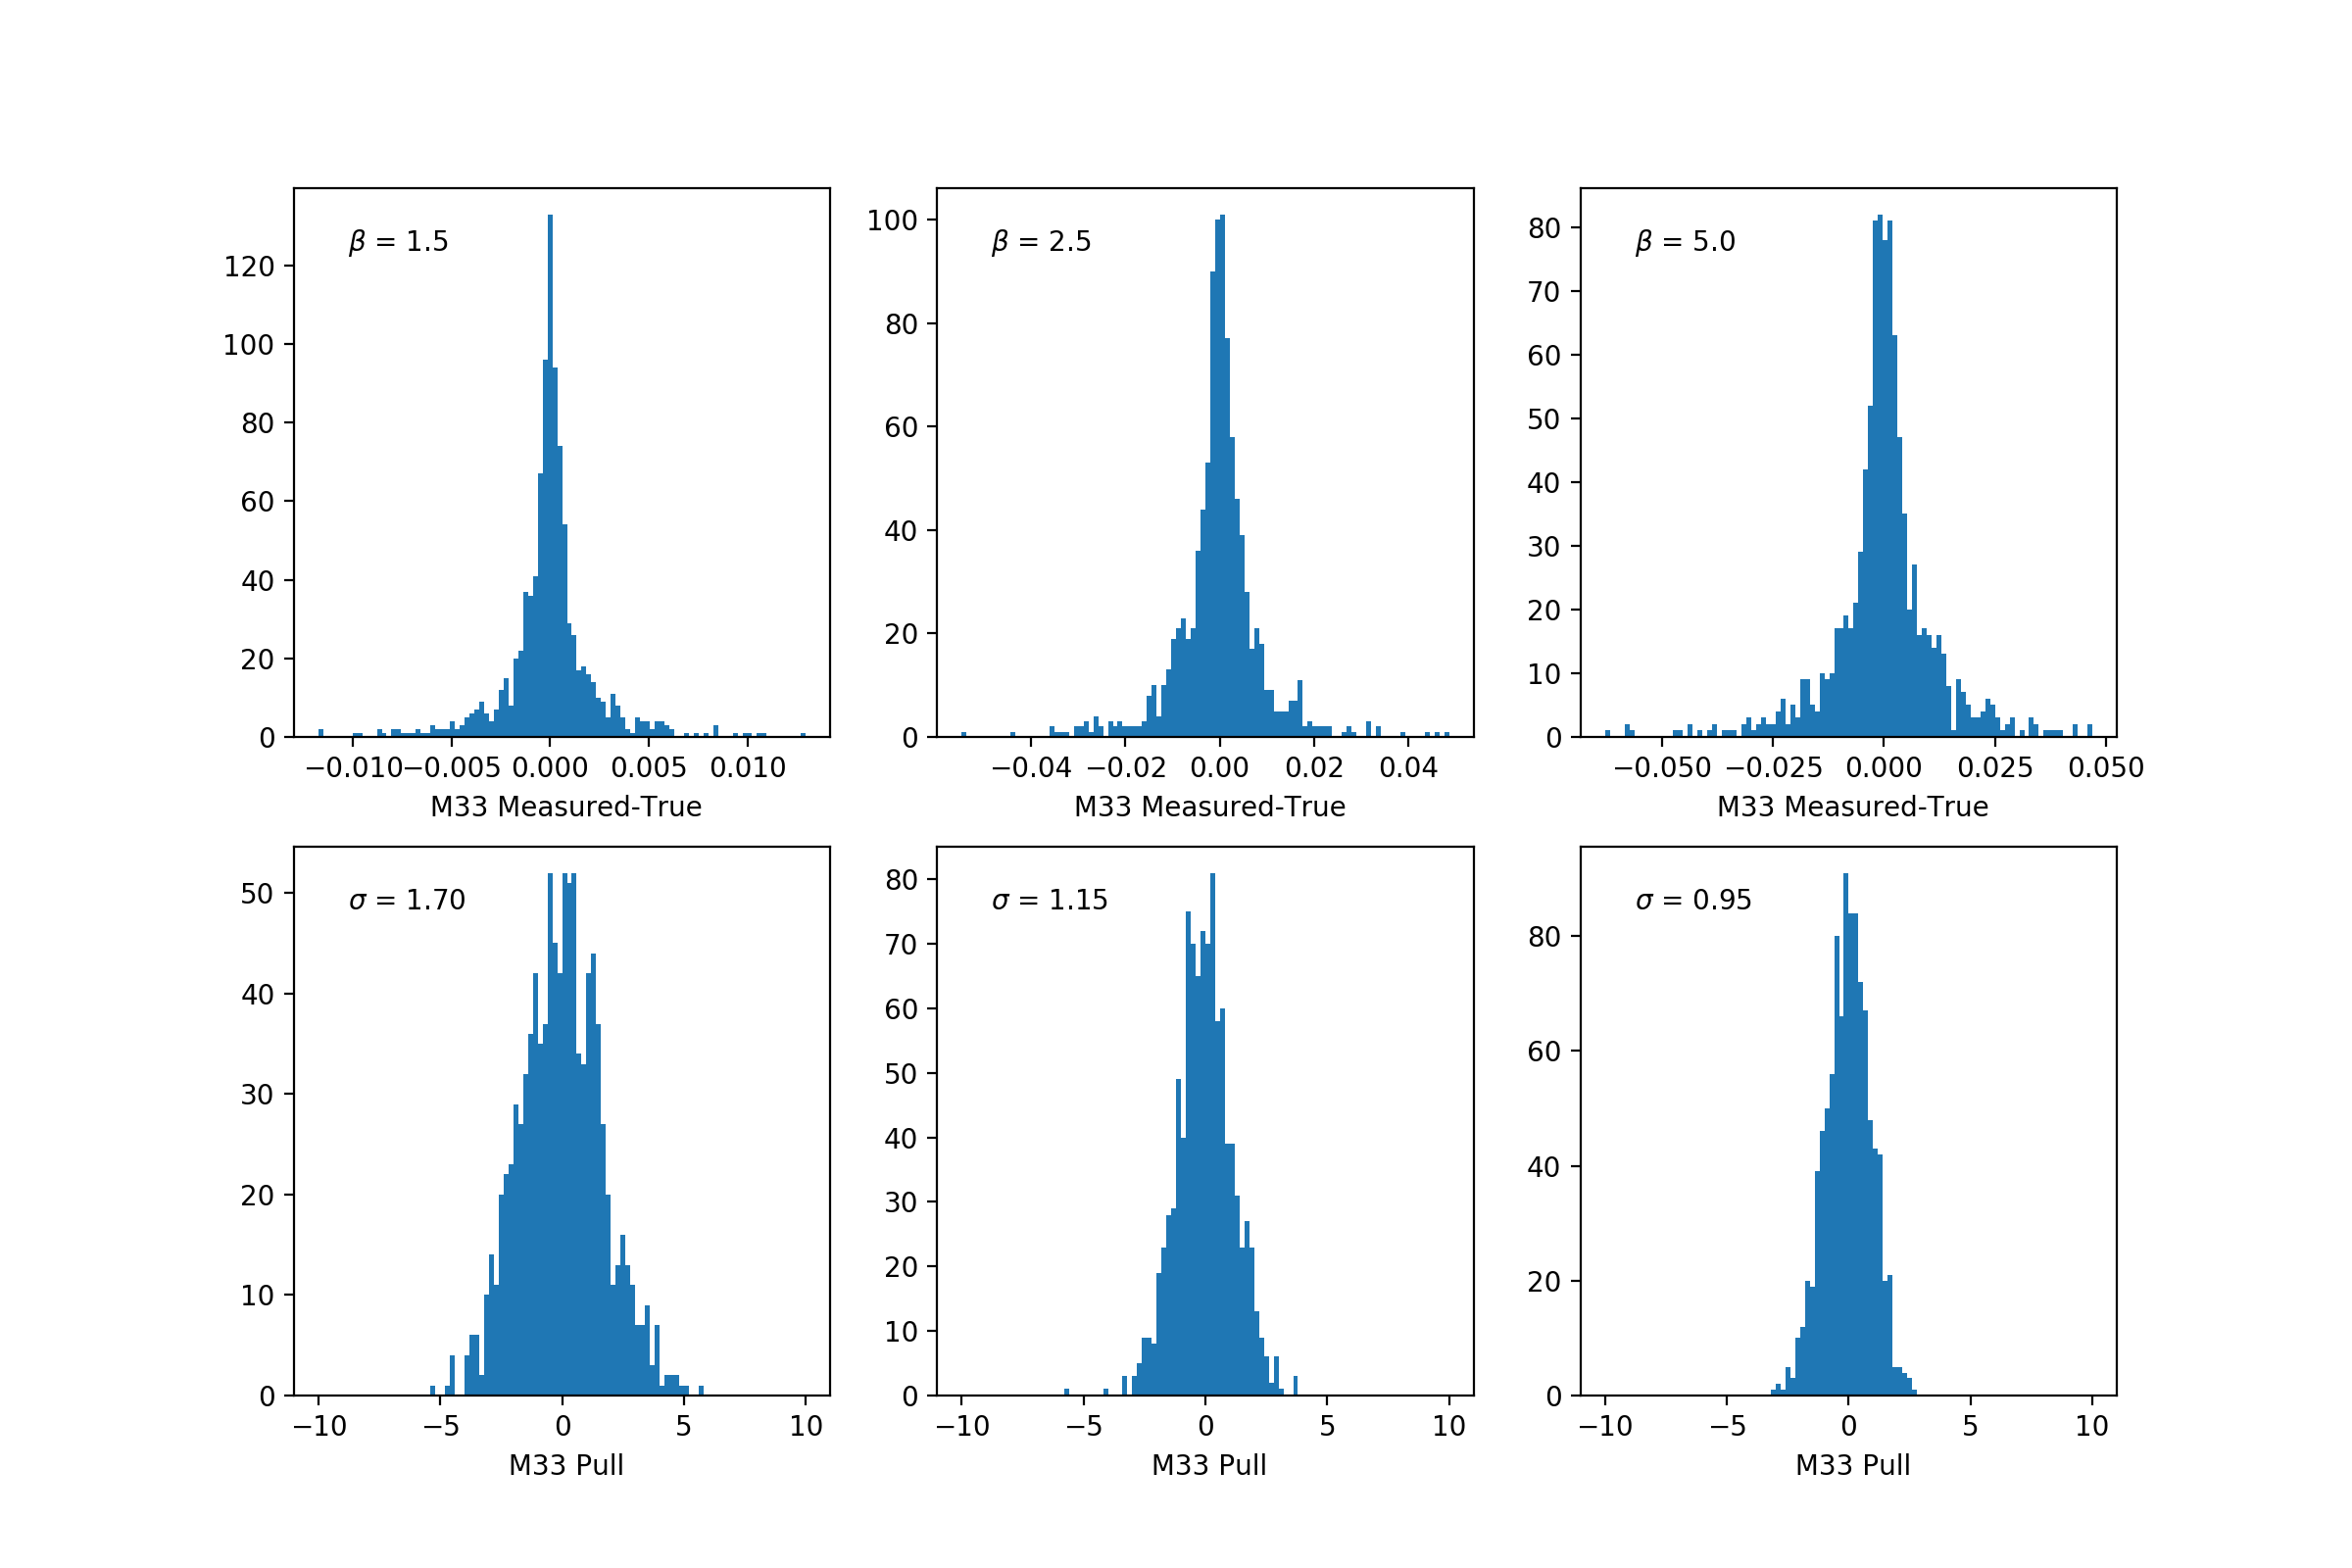

M44


<IPython.core.display.Javascript object>

M22n


<IPython.core.display.Javascript object>


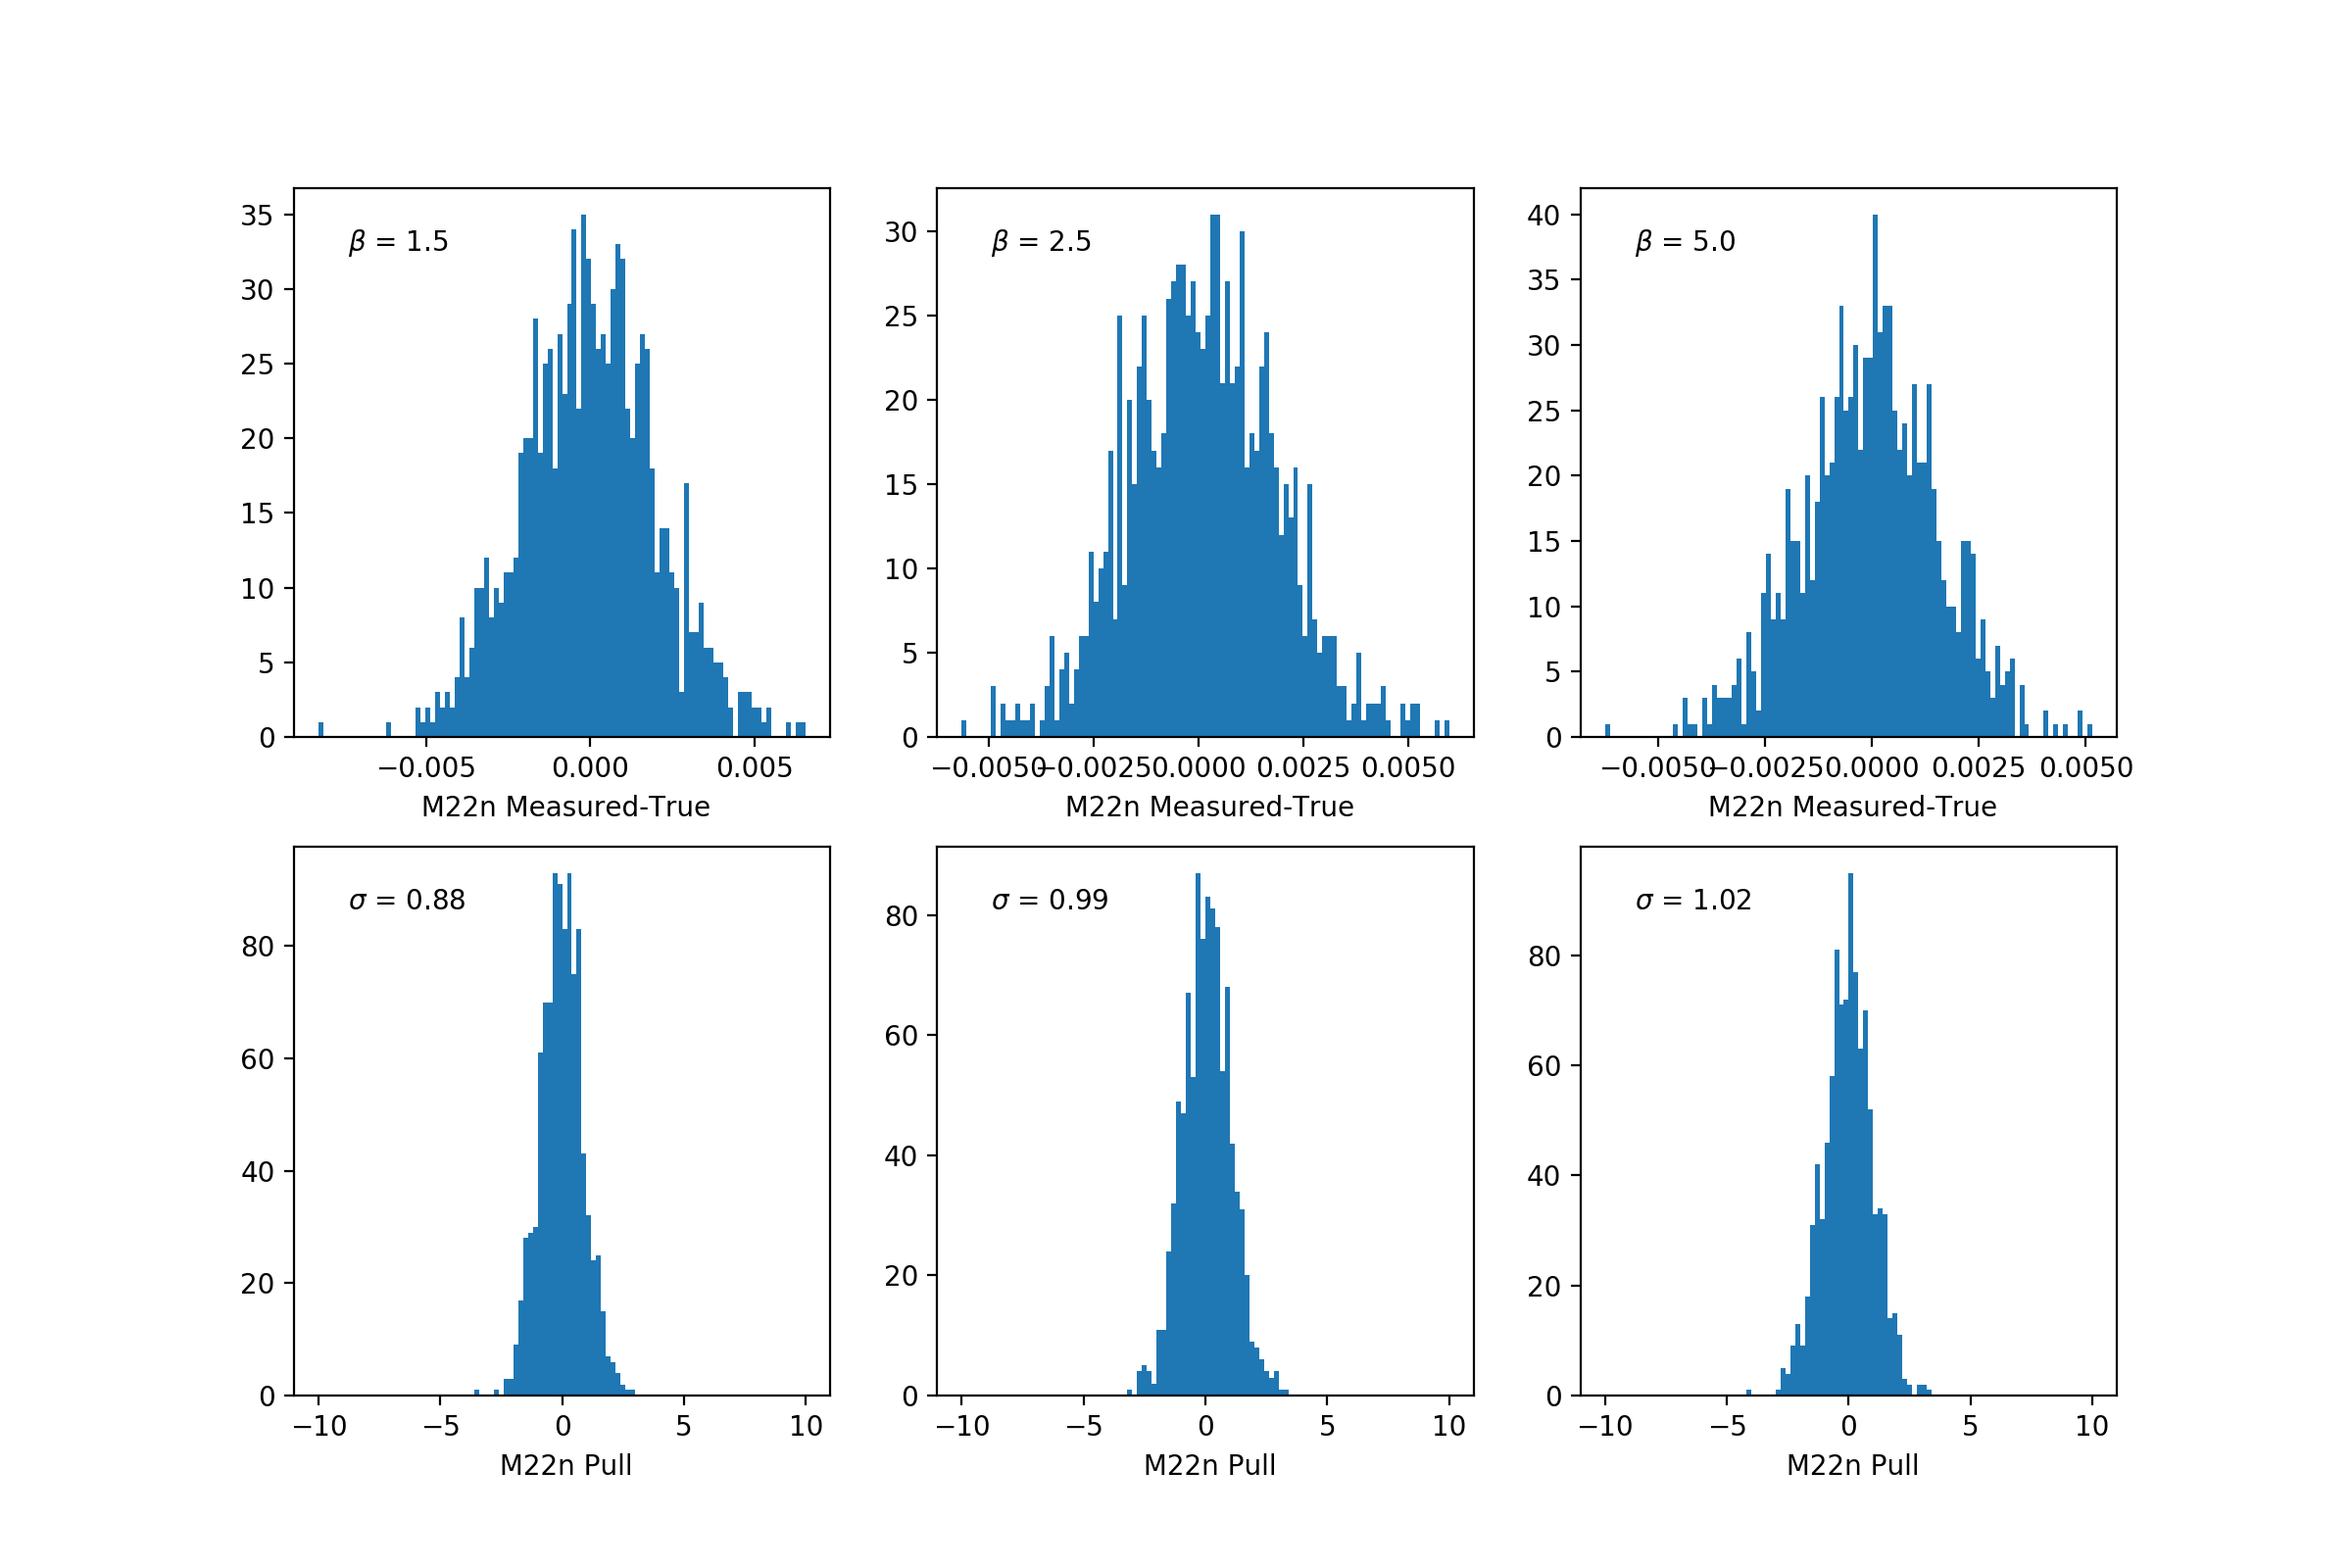

M33n


<IPython.core.display.Javascript object>


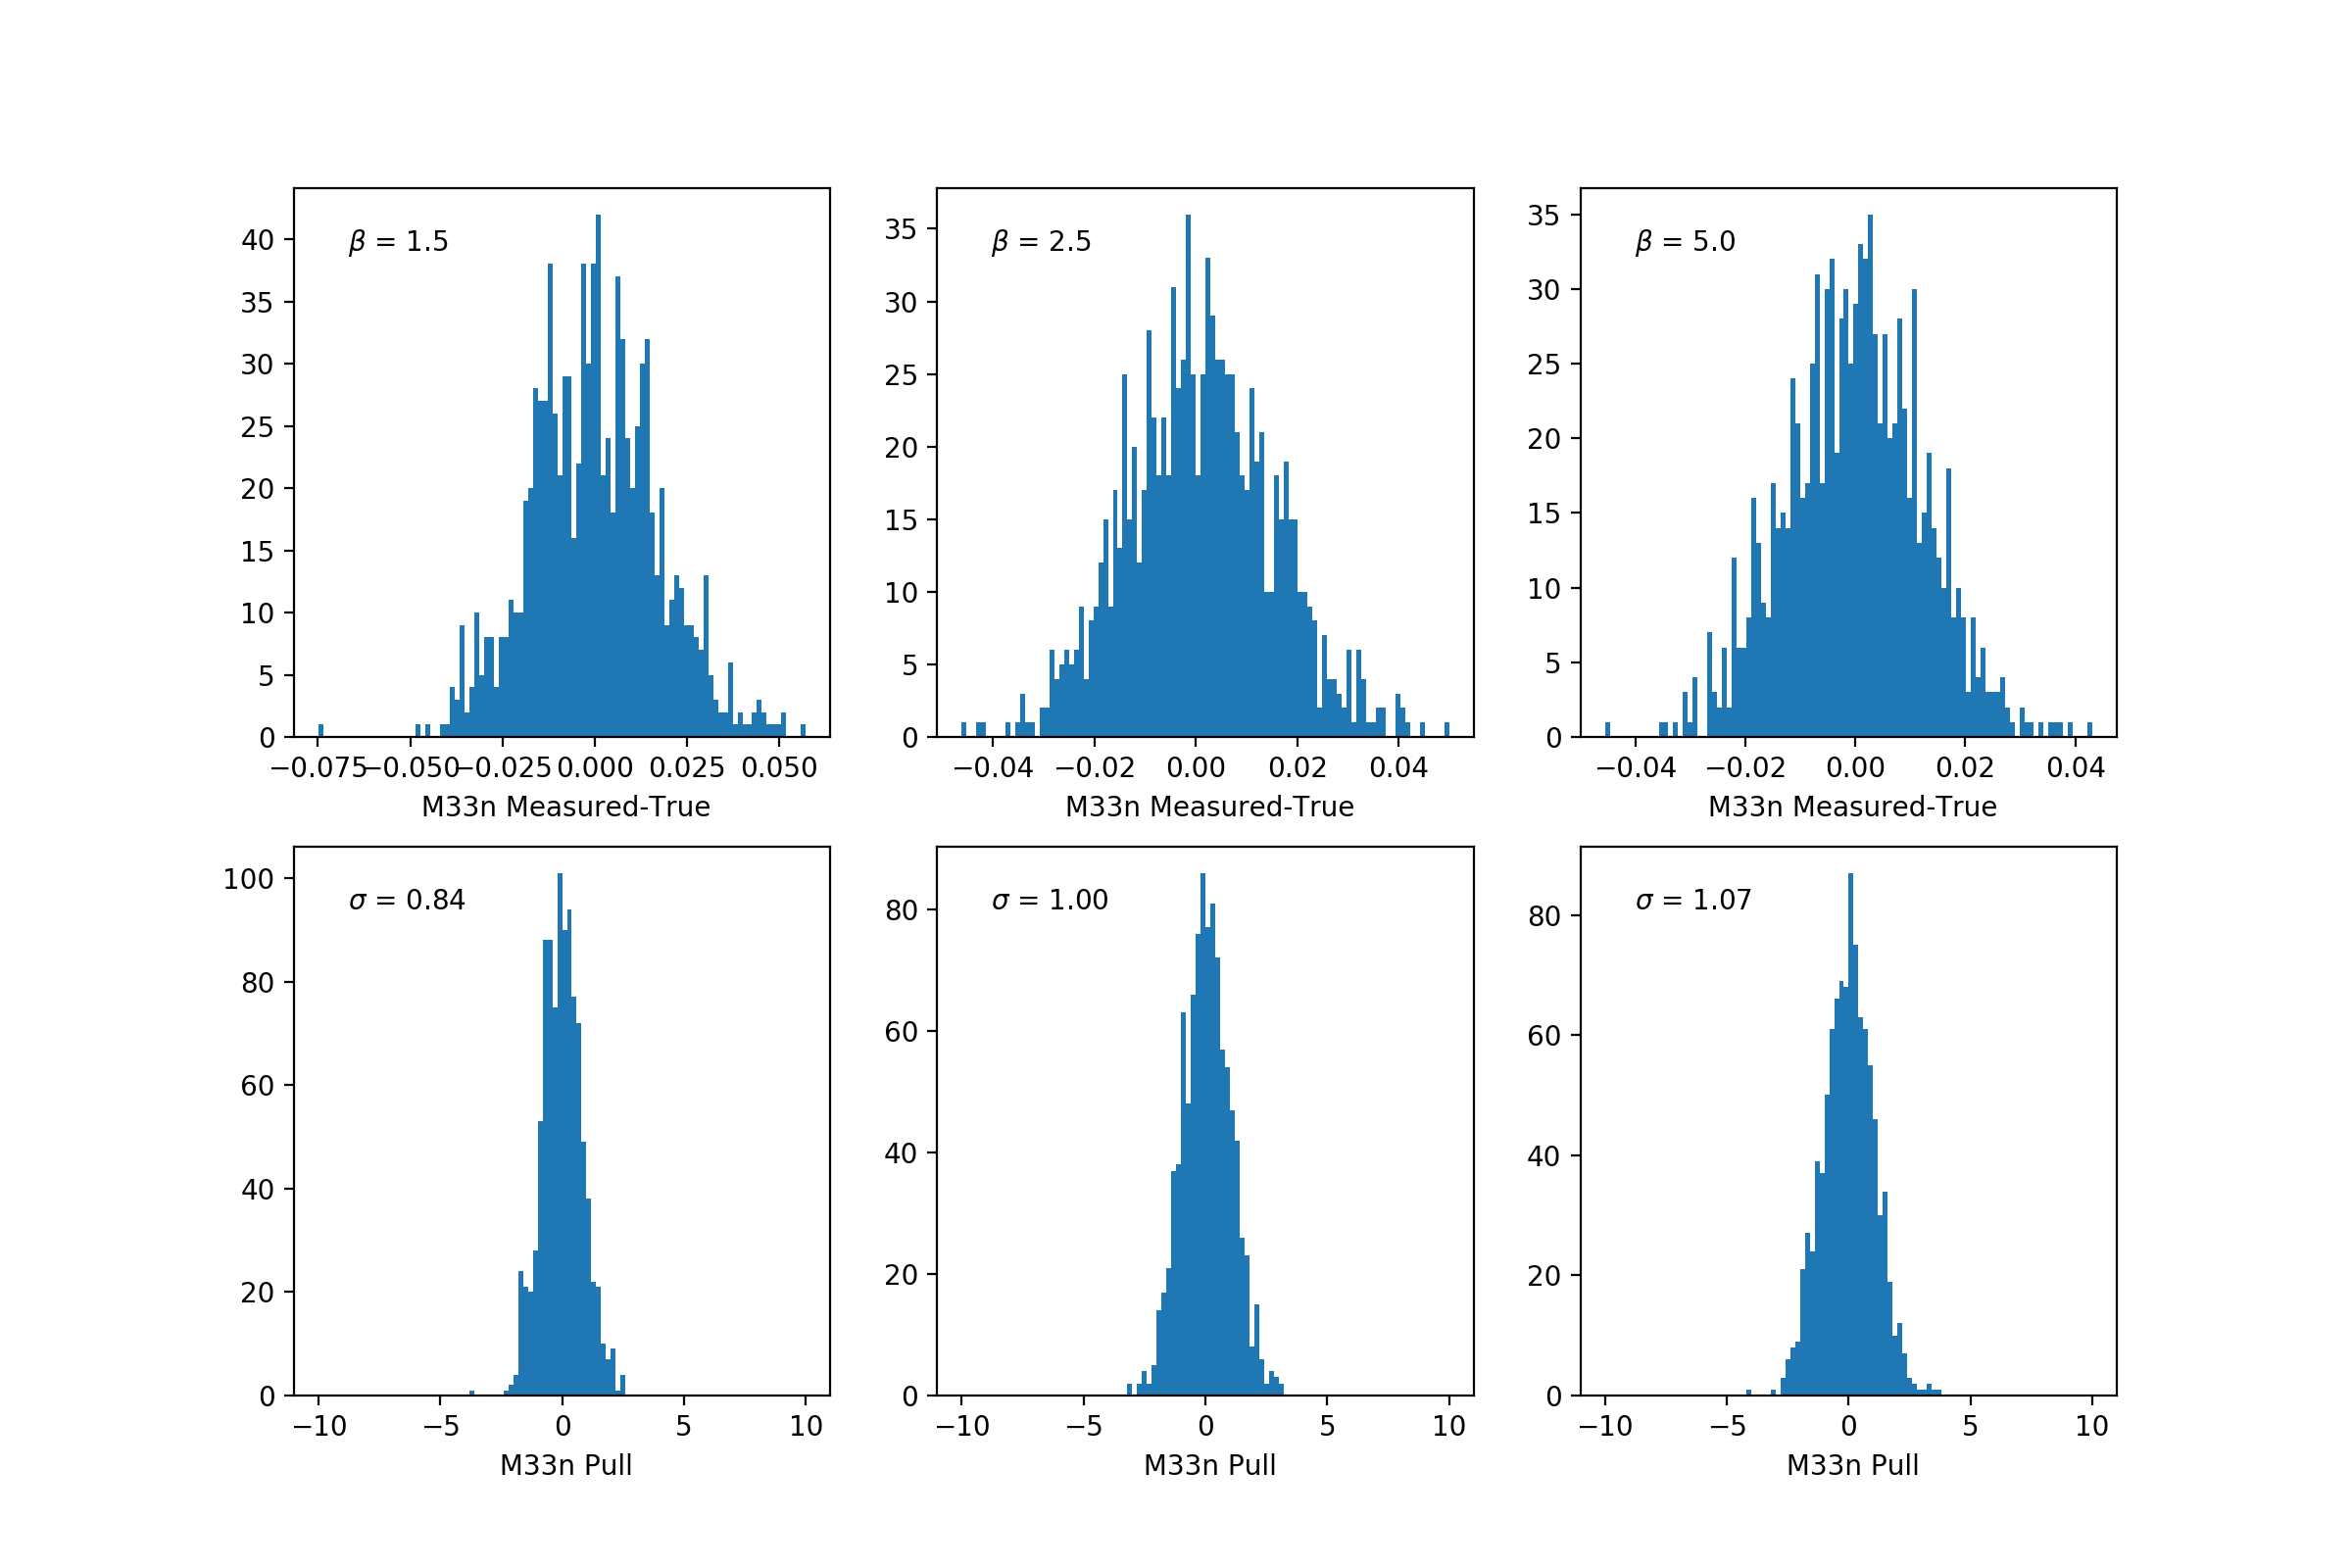

M44n


<IPython.core.display.Javascript object>


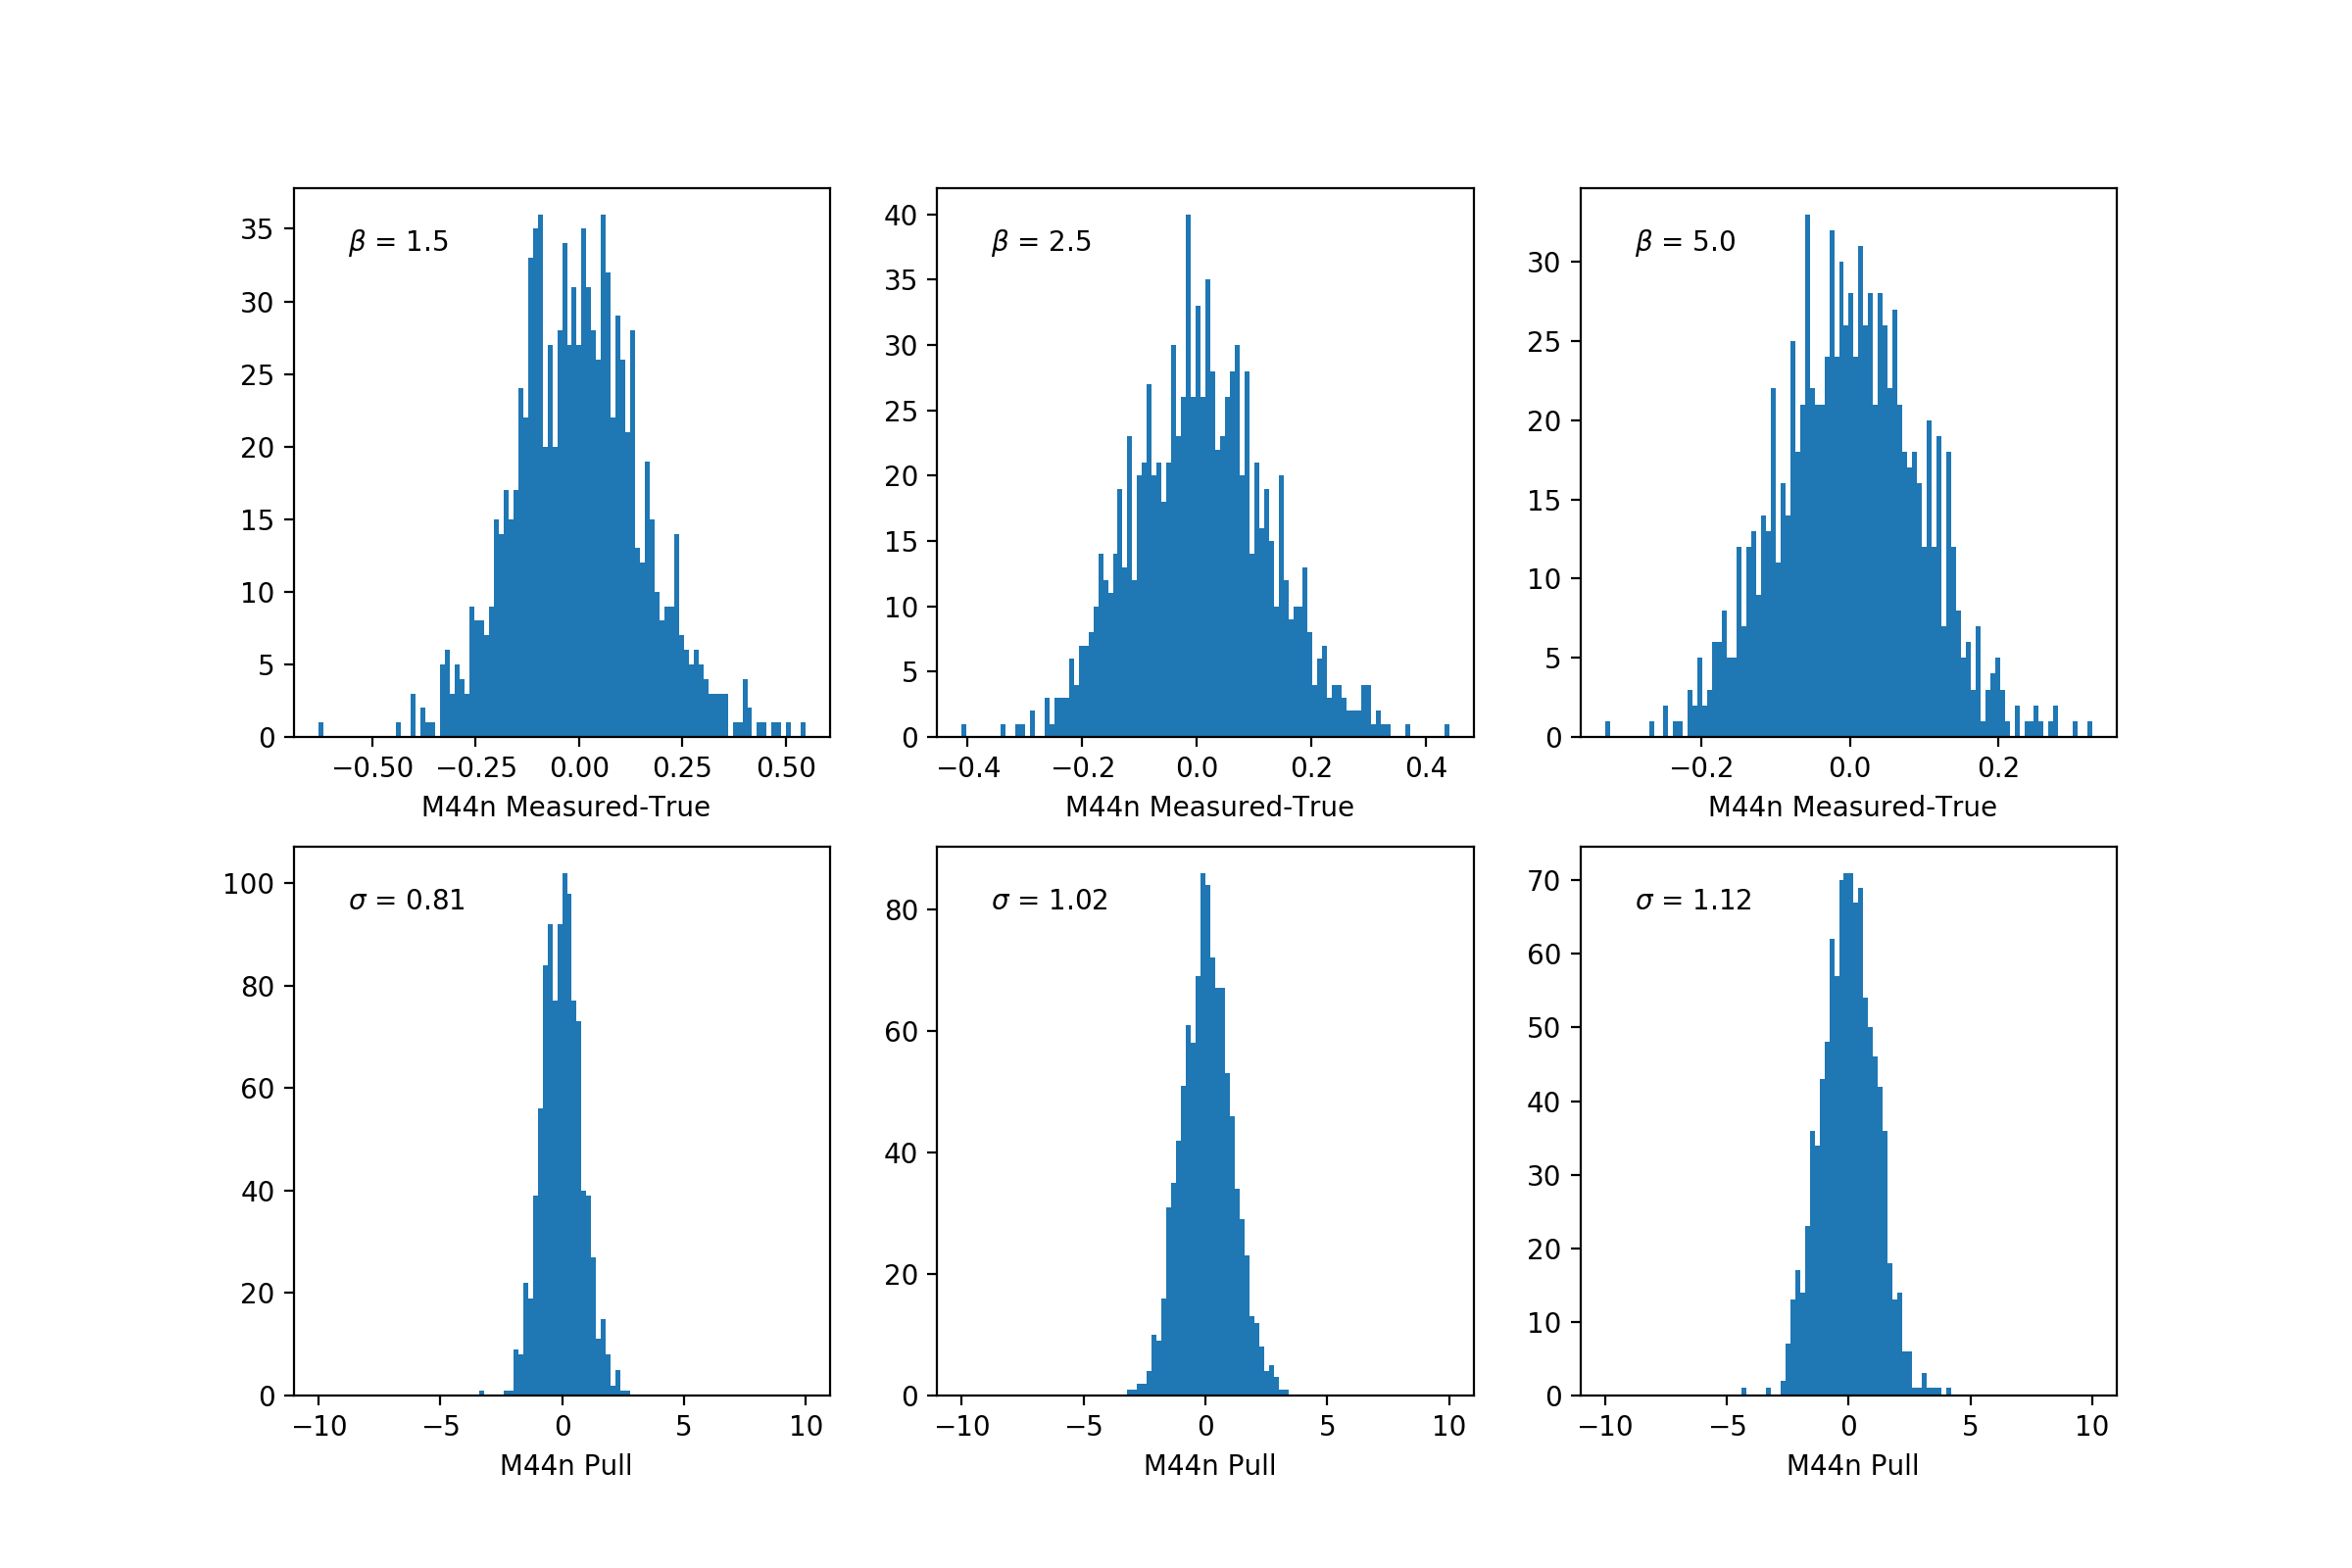

[[1.0243233701606684, 0.9966389588051382, 0.986768638781656], [0.9814948011026111, 0.9974521243602743, 0.9628922664285895], [1.329671422895534, 1.045359974252958, 0.9508335810556877], [1.0993435811685224, 1.0298301189655403, 0.9318727421177324], [1.1122837762898217, 1.023089270666856, 0.9797891406714211], [0.9304673235870602, 0.9850903387334569, 0.9738135628254441], [0.9275600988133027, 0.9998509084368035, 1.0447562220243694], [0.9947569618757867, 0.9971635603185922, 0.967363556901636], [0.9413212656670495, 1.0154026887101943, 1.0030807429494395], [1.257616944534114, 1.082663858709489, 0.9234521009303258], [1.2877331069378266, 1.0885114301895626, 0.9957319206948948], [1.1994209853294968, 1.1363998986443407, 1.049415490516842], [1.2505994703970262, 1.169379607272627, 1.10679451870978], [1.4880130119338018, 1.09116209361464, 0.9465520252166363], [1.6954945763628801, 1.1548201388904302, 0.9485827118142943], [1.9769938395660065, 1.2346679978376232, 0.9536727676796108], [0.8799547558274292,

In [14]:
pdf = PdfPages("calculate_moments_test.pdf")

momentlist = ['M10','M01','M11','M20','M02','M21','M12','M30','M03','M31','M13','M40','M04','M22','M33','M44','M22n','M33n','M44n']

rmslist = []

for i,amoment in enumerate(momentlist):
    print(amoment)
    rmslist.append(makepullplots(amoment,pdf=pdf))

pdf.close()
print(rmslist)

In [13]:
# look at summary stats
drms = pd.DataFrame(rmslist,columns=['rms1p5','rms2p5','rms5'],index=momentlist)
print(drms)

        rms1p5    rms2p5      rms5
M10   1.024323  0.996639  0.986769
M01   0.981495  0.997452  0.962892
M11   1.329671  1.045360  0.950834
M20   1.099344  1.029830  0.931873
M02   1.112284  1.023089  0.979789
M21   0.930467  0.985090  0.973814
M12   0.927560  0.999851  1.044756
M30   0.994757  0.997164  0.967364
M03   0.941321  1.015403  1.003081
M31   1.257617  1.082664  0.923452
M13   1.287733  1.088511  0.995732
M40   1.199421  1.136400  1.049415
M04   1.250599  1.169380  1.106795
M22   1.488013  1.091162  0.946552
M33   1.695495  1.154820  0.948583
M44   1.976994  1.234668  0.953673
M22n  0.879955  0.985517  1.017496
M33n  0.835669  0.999379  1.065365
M44n  0.809727  1.021675  1.119339
